In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal
# del KR0

In [95]:
import scipy.stats as SS
from scipy.integrate import quad
import scipy.stats as SS
def g_c(x):
    return SS.cauchy.pdf(x,0,1)
def g_n(x):
    return SS.norm.pdf(x,0,1)
def KR0(m,O_0,dist='normal'):
    X = np.logspace(np.log10(0.1),np.log10(50),num=1000,base=10)
    Ks = np.linspace(0.01,20,20000)
    if dist.upper() == "Normal".upper():
        g= g_n
    else:
        g= g_c
    # def r_0(X,m,g,O_0):
    #     O_d = min(O_0,X)
    #     theta_0 = np.arcsin(O_d/X)
    #     integrand_l = lambda x:np.cos(x)**2*g(X*np.sin(x))
    #     integrand_d = lambda x:(1/x**3)*g(x)
    #     I_l,err_l = quad(integrand_l,-theta_0,theta_0,limit=200) #lock
    #     I_d,err_d = quad(integrand_d,O_d,np.inf,limit=200) #drift
    #     r0 = X*I_l - X/(m**2)*I_d
    #     return r0
    def r_0(X,m,g,O_0):
        O_d = min(O_0,X)
        theta_0 = np.arcsin(O_d/X)
        integrand_l = lambda x:np.cos(x)**2*g(X*np.sin(x))
        integrand_d = lambda x,m=m:(1/(2*(1+(x*m)**2)))*g(x)
        I_l,err_l = quad(integrand_l,-theta_0,theta_0,limit=200) #lock
        I_d,err_d = quad(integrand_d,O_d,np.inf,limit=200) #drift
        r0 = X*I_l - X*2*m*I_d
        return r0
    # def r_0(X,m,g,O_0):
    #     O_d = min(O_0,X)
    #     theta_0 = np.arcsin(O_d/X)
    #     # integrand_l = lambda x:np.cos(x)**2*g(X*np.sin(x))
    #     def integrand_l(x,X=X):
    #         if (1-x**2/X**2)>0:
    #             return g(x)*(1-x**2/X**2)**0.5
    #         else:
    #             return 0
    #     # integrand_l = lambda x,X=X:g(x)*(np.max(0,(1-x**2/X**2)))**0.5

    #     integrand_d = lambda x,m=m:(1/(2*(1+(x*m)**2)))*g(x)
    #     I_l,err_l = quad(integrand_l,0,max(0,O_d),limit=200) #lock
    #     I_d,err_d = quad(integrand_d,O_d,np.inf,limit=200) #drift
    #     r0 = 2*I_l - 2*X*m*I_d
    # r_0 = np.vectorize(r_0)

    r_before = r_0(X,m,g,O_0)
    KB =[]
    RB =[]
    for K_  in  Ks:
        TEMP_2 = (X/K_)[abs(r_before-X/K_)<2e-4]
        if len(TEMP_2)!=0:
            for R_ in TEMP_2:
                KB.append(K_)
                RB.append(R_)
    (K_under,R_under),(K_over,R_over) = split_uo(KB,RB)
    return (K_under,R_under),(K_over,R_over)

In [3]:
folder = '230721 statphys poster/TLO/'
df_TLO = pd.read_excel(f'{folder}N = 500 seed = 10 dt = 0.1 normal TLO.xlsm',index_col=[0,1])
name = 'normal'

In [4]:
df_f_cluster = pd.read_excel(f'{folder}N = 500 seed = 10 dt = 0.1 {name} cluster TLO.xlsm',index_col=[0,1])


In [5]:
cluster_size = ['c0', 'c1', 'c2', 'c3', 'c4','c5', 'c6', 'c7', 'c8', 'c9']
cluster_pvel = ['c0 phase vel', 'c1 phase vel','c2 phase vel', 'c3 phase vel', 'c4 phase vel', 'c5 phase vel','c6 phase vel', 'c7 phase vel', 'c8 phase vel', 'c9 phase vel']

In [6]:
seed = 10
N = 500
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega) - np.mean(omega)

In [7]:
def to_mdf(df,m):
    ms = df.reset_index().m.unique()
    re_df = df.reset_index()

    df_m = re_df[re_df.m == m]
    Ks = df_m.K.to_numpy()
    df_m = df_m.set_index('K')
    return df_m,Ks
def to_maxomega(x):
    if type(x)!= float:
        cluster = omega[np.array(list(map(int,x.split(' '))))] 
        cluster -= np.mean(cluster)
        return np.max(abs(cluster))
    else: return np.nan

def KR_underK(set,K):
    Ks,Rs = set
    K_ = Ks[Ks<K] 
    R_ = Rs[Ks<K] 
    return (K_,R_)

In [8]:
# K_backs = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
K_backs = [3,4,5,6,10,15]
# K_backs = [3,4,6,10,15]

df_b_dick = {}
for K_back in  K_backs:
    df_b_dick[K_back] = pd.read_excel(f'{folder}N = 500 seed = 10 dt = 0.1 normal {K_back}-0 TLO.xlsm',index_col=[0,1])
    
tab_color_list = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray']
df = pd.read_excel(f'{folder}N = 500 seed = 10 dt = 0.1 normal TLO.xlsm',index_col=[0,1])


In [9]:
O_p = lambda Kr,m: (4/np.pi)*np.sqrt(Kr/m)
def get_nearest_KR(R,F_new):
    F_K,F_R = F_new
    r_idx = np.searchsorted(F_R,R)
    return F_K[r_idx],F_R[r_idx]
def get_near_o(R,F_new,m):
    F_K,F_R = F_new
    r_idx = np.searchsorted(F_R,R)
    K_new,r_new = F_K[r_idx],F_R[r_idx]
    O = O_p(K_new*r_new,m)
    return O

In [10]:
m_to_draw = 6

KF,RF,KB,RB= KR(m_to_draw)
F = KF,RF
B = KB,RB
F_new = dK_graph(F,0.05)
BU,BO = split_uo(*B)

In [11]:
df_6,Ks = to_mdf(df,m_to_draw)
K_rs = df_6.r
O_p = lambda Kr,m: (4/np.pi)*np.sqrt(Kr/m)
O_ps = (K_rs*Ks).apply(O_p,m=m_to_draw)
O_ps_n = K_rs.apply(get_near_o,F_new=F_new,m=m_to_draw)

df_m_cluster,Ks = to_mdf(df_f_cluster,m_to_draw)
df_m_r,Ks = to_mdf(df,m_to_draw)
max_o = df_m_cluster['c0 list'].apply(to_maxomega)

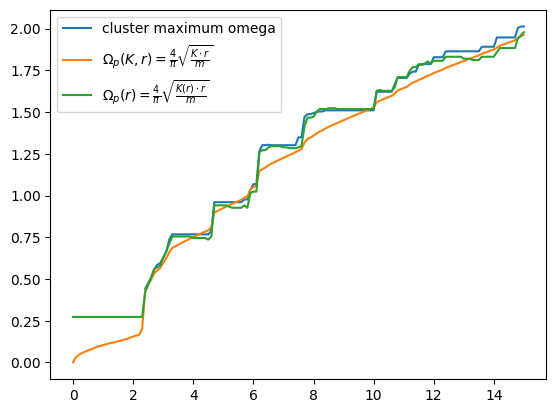

In [12]:
plt.plot(Ks,max_o,label = r'cluster maximum omega')
plt.plot(Ks,O_ps,label = r'$\Omega_p(K,r) = \frac{4}{\pi}\sqrt{\frac{K\cdot r}{m}}$')
plt.plot(Ks,O_ps_n,label=r'$\Omega_p(r) = \frac{4}{\pi}\sqrt{\frac{K(r)\cdot r}{m}}$')
plt.legend()

In [13]:
D_sets_op_n = {}
U_sets_op_n = {}
for K in K_backs:
    O = O_ps_n.iloc[int(K*10)]
    O_ = max_o.loc[K]
    if ~np.isnan(O_):
        D,U = KR0(m_to_draw,O)
        D_sets_op_n[K] = D
        U_sets_op_n[K] = U

In [14]:
backs_r = []
backs_K = []
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()
    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    backs_K.append(Ks[-1])
    backs_r.append(rs[-1])

In [15]:
D_sets_op_B = {}
U_sets_op_B = {}
for K,r in zip(backs_K,backs_r):
    O = get_near_o(r,F_new,m_to_draw)
    D,U = KR0(m_to_draw,O)
    D_sets_op_B[K] = D
    U_sets_op_B[K] = U


In [16]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

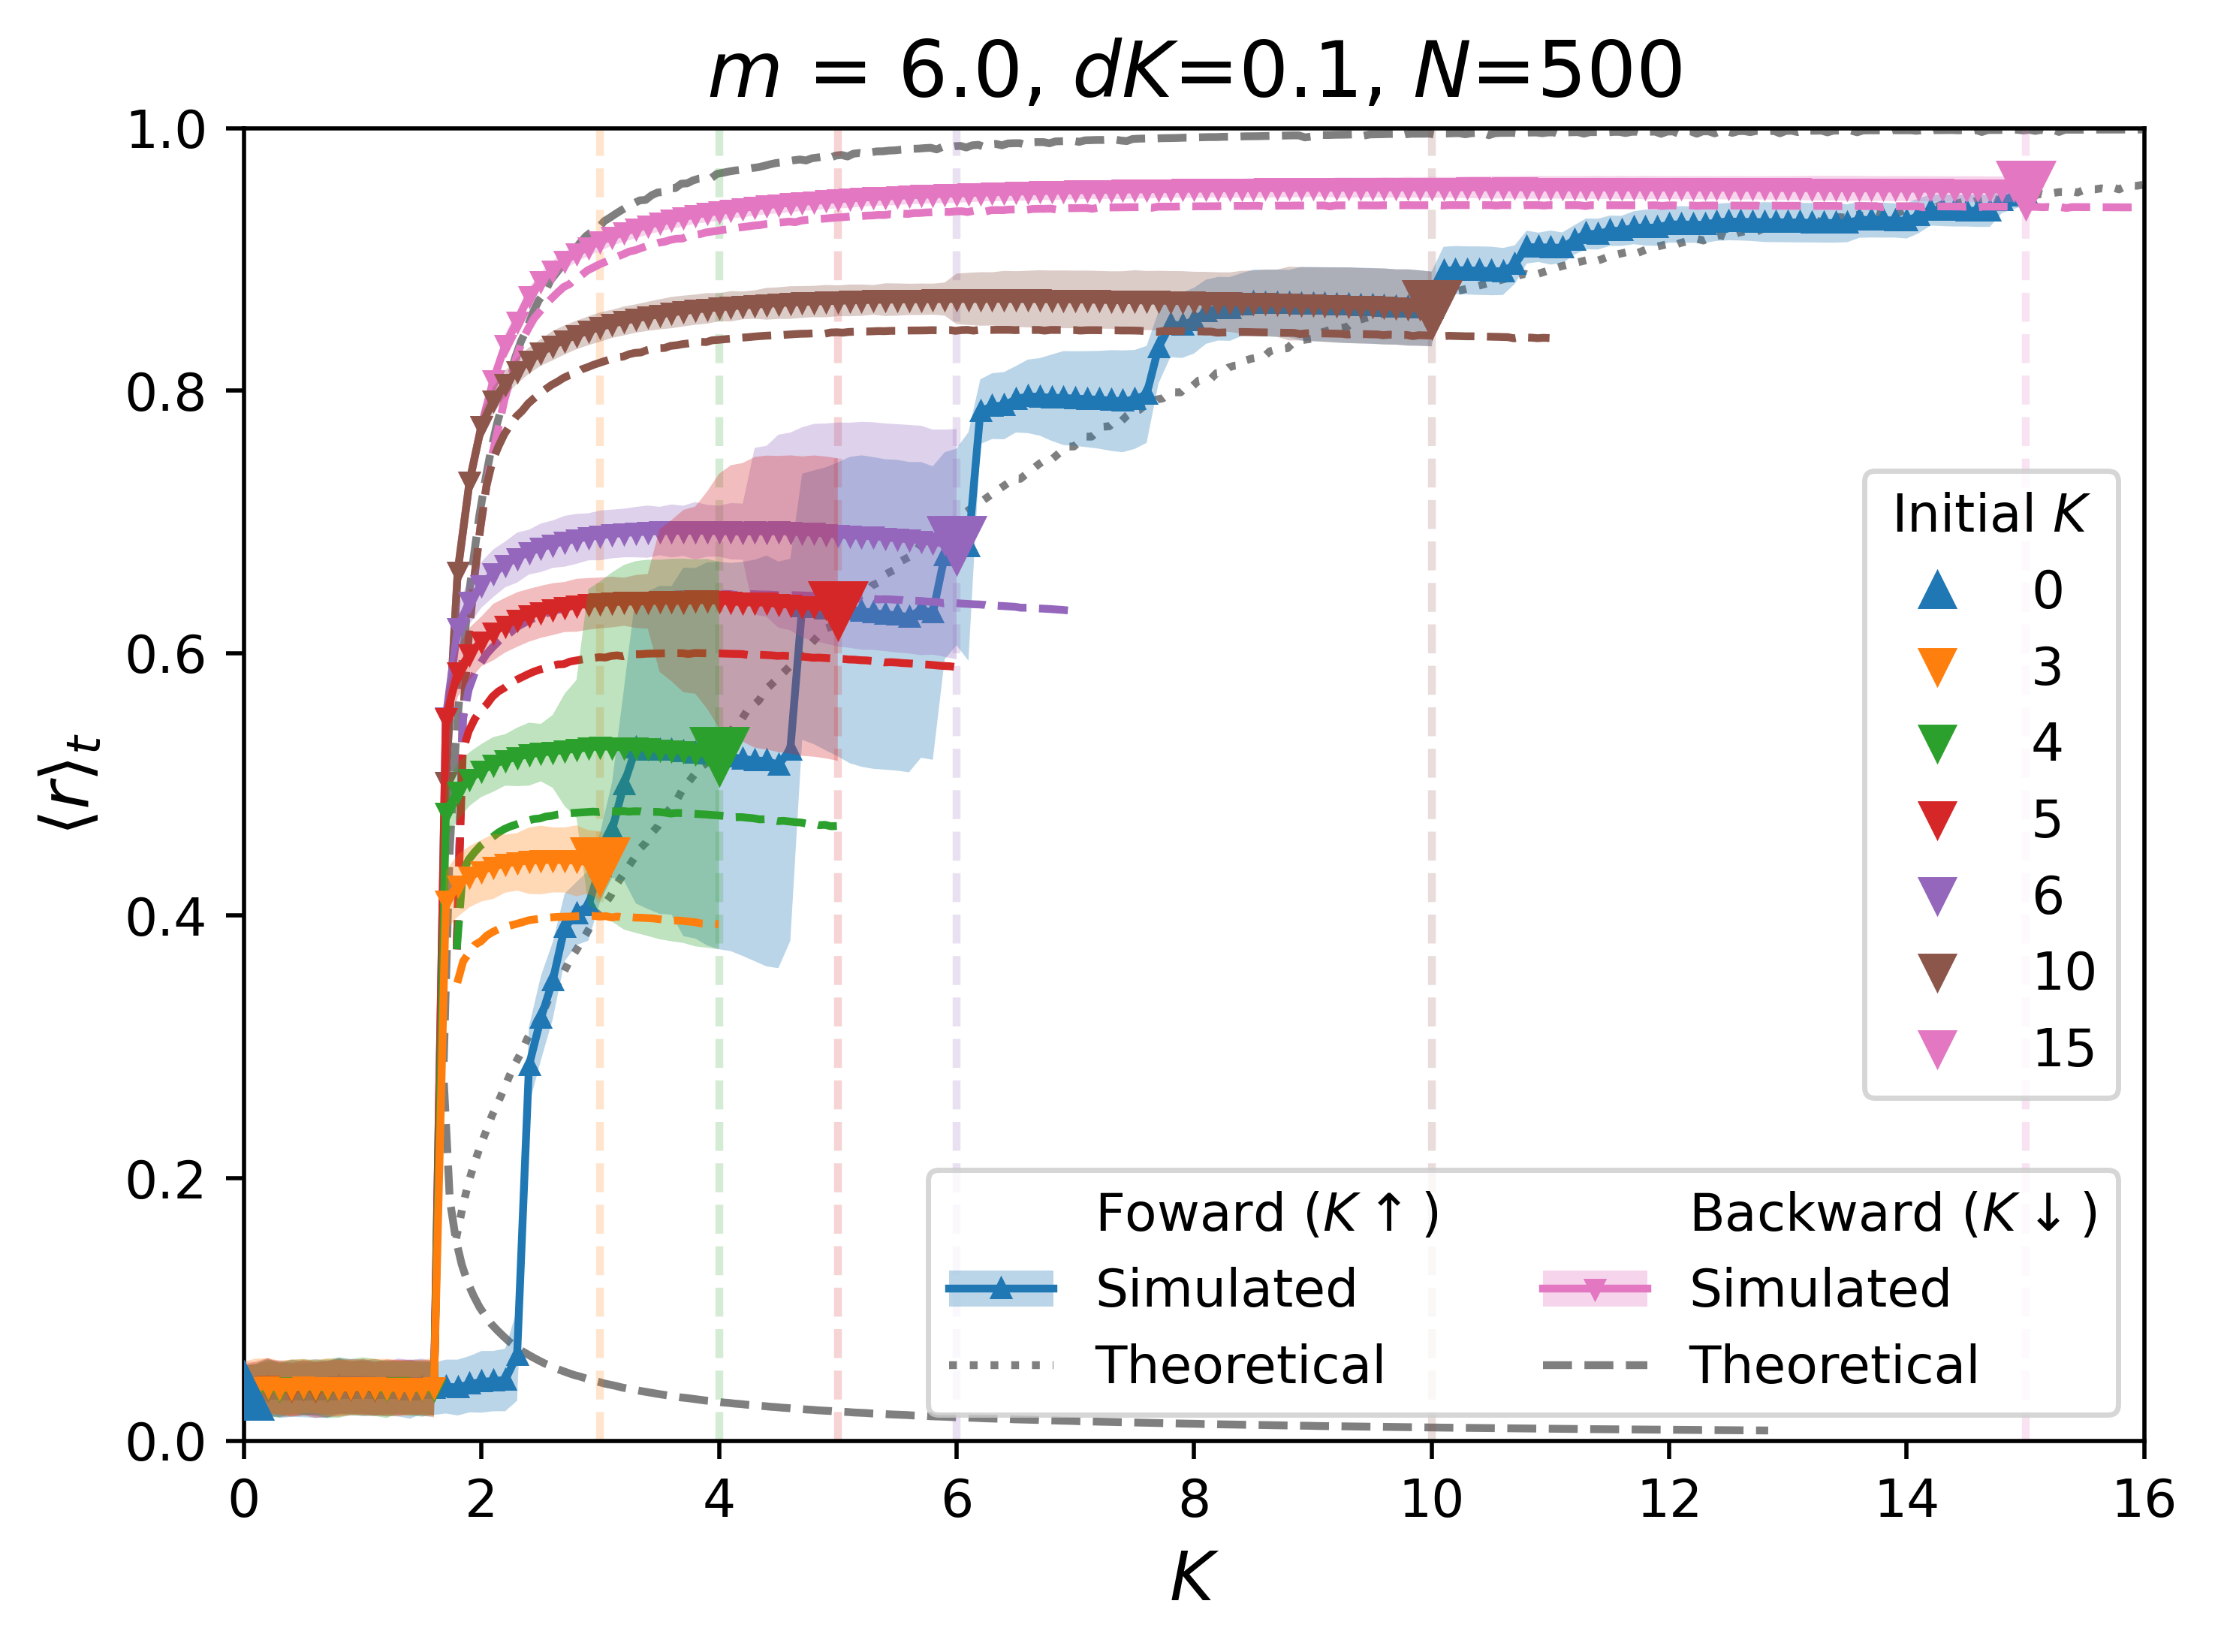

In [18]:
plt.figure(figsize=(6,4.5),dpi=500)
ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()

lf,= plt.plot(Ks,rs,'-',label=r'$K_{forward}$',color = 'tab:blue')
_,= plt.plot(Ks[0],rs[0],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=10,zorder=10)
mf,= plt.plot(Ks[:],rs[:],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=3)
ff = plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)
plt.legend([(lf,ff)],K_backs,title=f'Backward')

backs_r = []
backs_K = []
num = len(df_b_dick)+1
num_c = 1
B_legends = []
B_legends2 = ()
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    backs_K.append(Ks[-1])
    backs_r.append(rs[-1])
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
    l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
    m,=plt.plot(Ks[:],rs[:],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
    _,=plt.plot(Ks[-1],rs[-1],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=10)
    Ku,Ru = U_sets_op_n[K_back]
    if type(Ku)== float:
        plt.plot(Ku,Ru,':',color = tab_color_list[num_c],zorder= num)
    else: 
        Ku_ = Ku[Ku<K_back+1] 
        Ru_ = Ru[Ku<K_back+1] 
        plt.plot(Ku_,Ru_,linestyle='--',color = tab_color_list[num_c],zorder= num)
    f=plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num)
    num -=1
    num_c +=1
    B_element = (l,m,f)
    B_label = K_back
    B_legends.append(B_element)
ax = plt.gca()
plt.legend(B_legends,K_backs,title=f'Backward')#,handler_map={tuple: HandlerTuple(ndivide=None)})



p0, = plt.plot(np.nan,np.nan,'^',color=tab_color_list[0])
p1, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[1])
p2, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[2])
p3, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[3])
p4, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[4])
p5, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[5])
p6, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[6])

string = ', '.join(map(str,K_backs))
ax =plt.gca()

plt.xlim(0,16)
plt.ylim(0,1)
p_F, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
p_B, = plt.plot([0],  marker='None',
        linestyle='None', label='dummy-empty')
categories = ['Simulated','Theoretical']

F_, = plt.plot(*KR_underK(F_new,16),':',color ='tab:gray',zorder=0)
B_, = plt.plot(*KR_underK(BU,16),linestyle='--',color = 'tab:gray',zorder=0)
plt.plot(*KR_underK(BO,16),linestyle='--',color = 'tab:gray',zorder=0)
leg3 = plt.legend([p_F,(lf,mf,ff),F_, p_B, (l,m,f), B_],
                    [r'Foward ($K\uparrow$)'] + categories + [r'Backward ($K\downarrow$)'] + categories,
                    loc = 4,ncol=2)
leg_c = plt.legend([p0,p1,p2,p3,p4,p5,p6],[0]+K_backs,loc=5,title=r'Initial $K$')


ax.add_artist(leg3)
plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
plt.ylabel(r'$\langle$$r$$\rangle$$_t$',fontsize=13)
plt.xlabel(r'$K$',fontsize=13)
plt.tight_layout()


<Axes: >

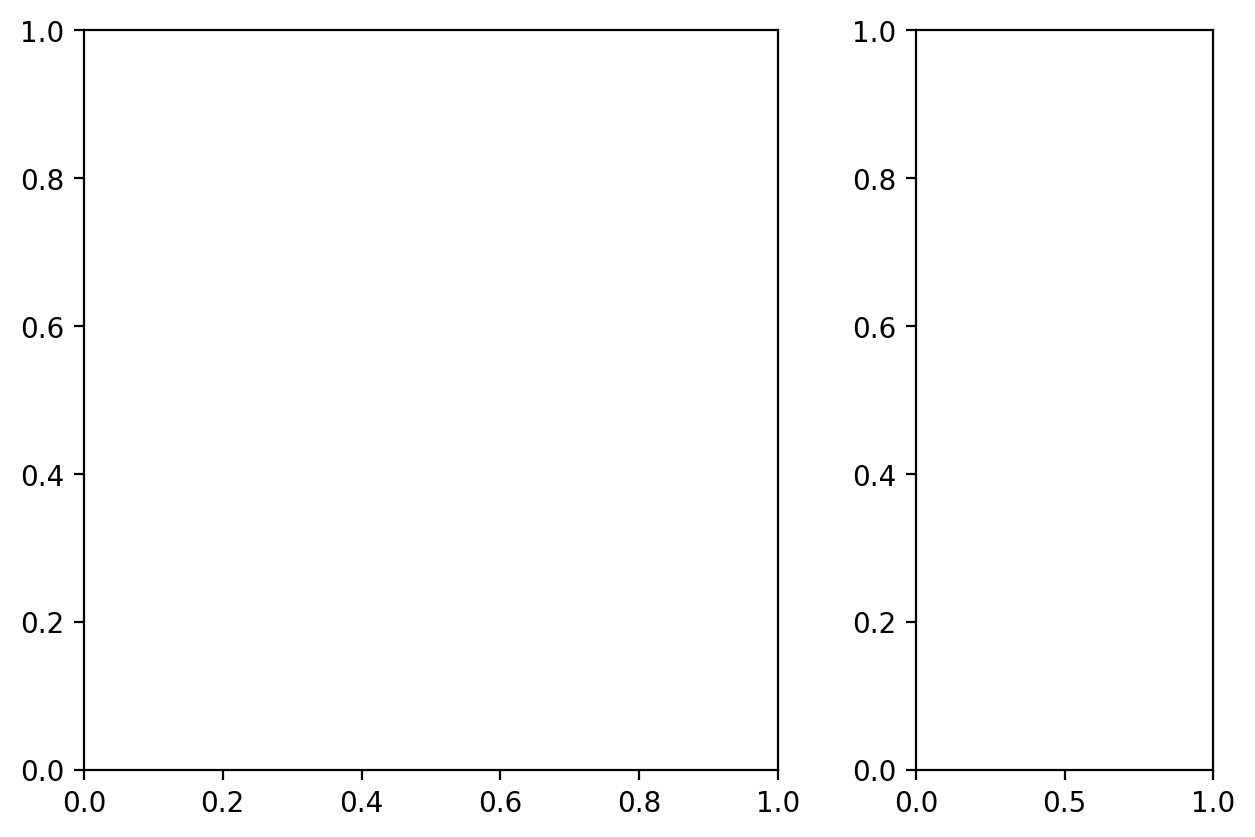

In [ ]:
fig = plt.figure()
fig_r,fig_s = fig.subfigures(1,2,wspace=0.5,width_ratios=[7,3])
fig_r.subplots(1)
fig_s.subplots(1)

In [ ]:
def re_cluster(df,direction,K_start):
    S = df['c0'].unstack().to_numpy()
    c_s = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6','c7', 'c8', 'c9']
    c_o = ['c0 phase vel', 'c1 phase vel', 'c2 phase vel','c3 phase vel', 'c4 phase vel', 'c5 phase vel', 'c6 phase vel','c7 phase vel', 'c8 phase vel', 'c9 phase vel']
    df_new = df.copy()
    re_df = df.reset_index()
    Ks = re_df.K.unique()
    ms = re_df.m.unique()
    datas = []
    for m in ms:
        for K in Ks:
            temp_o = df.loc[(K,m)][c_o].dropna().to_numpy()
            temp_s = df.loc[(K,m)][c_s].dropna().to_numpy()
            rstd = df.loc[(K,m)]['rstd']
            o10 = temp_o[temp_s>10]
            s10 = temp_s[temp_s>10]
            num_p = 0
            num_m = 0
            if len(o10) != 0:
                if abs(o10[0])<0.5:
                    data = [K,m,o10[0],s10[0],'main',rstd,direction,K_start]
                    datas.append(data)
                    df_new.loc[(K,m),'main_s'] = s10[0]
                    df_new.loc[(K,m),'main_o'] = o10[0]
                    o_c10 = o10[1:]
                    s_c10 = s10[1:]
                else:
                    o_c10 = o10[:]
                    s_c10 = s10[:]
                if len(o_c10) != 0:            
                    argsort = np.argsort(s_c10)[::-1]
                    num_c_p = 0
                    num_c_m = 0
                    for i,tempo in enumerate(o_c10[argsort]):
                        if abs(tempo)<2.5:
                            if tempo > 0:
                                if num_c_p == 0:
                                    data = [K,m,o_c10[argsort[i]],s_c10[argsort[i]],'2nd cluster(+)',rstd,direction,K_start]
                                    num_c_p+=1
                                    datas.append(data)
                                df_new.loc[(K,m),f'p_s_{num_p}'] = s_c10[argsort[i]]
                                df_new.loc[(K,m),f'p_o_{num_p}'] = o_c10[argsort[i]]
                                num_p +=1
                            elif tempo < 0:
                                if num_c_m == 0:
                                    data = [K,m,o_c10[argsort[i]],s_c10[argsort[i]],'2nd cluster(-)',rstd,direction,K_start]
                                    num_c_m+=1
                                    datas.append(data)


                                df_new.loc[(K,m),f'm_s_{num_m}'] = s_c10[argsort[i]]
                                df_new.loc[(K,m),f'm_o_{num_m}'] = o_c10[argsort[i]]
                                num_m +=1
    return df_new,datas

In [ ]:
temp = {}
df_new_dict = {}
df_new_dict[0],temp[0] = re_cluster(df_TLO,'Foward',0)
for K_back,df_b in df_b_dick.items():
    df_new_dict[K_back],temp[K_back] = re_cluster(df_b,'Backward',K_back)

In [ ]:
temps = []
for K_back,df_b in temp.items():
    temps+=df_b

In [ ]:
df_data = pd.DataFrame(temps,columns=['K','m','cluster mean phase velocity','cluster size','type',r'$r$\'s temporal std','direction','K_start'])

In [ ]:
axs = fig_s.subplots(3,1,height_ratios=[4,1,1],sharex=True)

markers = ['^']+['v']*len(K_backs)
# markers = ['.']+[',']*len(K_backs)
TO_DRAW = ['main_s','p_s_0','m_s_0']
TEXT = ['main cluster',r'secondary cluster $(+)$',r'secondary cluster $(-)$']
for to_d, ax,text in zip(TO_DRAW,axs,TEXT):
    num = 0
    num_c = 0
    plt.sca(ax)
    for i,(K_back,df_b) in enumerate(list(df_new_dict.items())):

        ms = df_b.reset_index().m.unique()
        re_df = df_b.reset_index()

        df_m = re_df[re_df.m == m_to_draw]
        Ks = df_m.K.to_numpy()
        rs = df_m[to_d].to_numpy()/N
        rstd = df_m.rstd.to_numpy()
        rMM= df_m.rMM.to_numpy()
        plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
        l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
        m,=plt.plot(Ks[::1],rs[::1],markers[i],color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
        _,=plt.plot(Ks[-1],rs[-1],markers[i],color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=6)
        num +=1
        num_c +=1
        B_element = (l,m,f)
        B_label = K_back
        B_legends.append(B_element)
        min_,_ = plt.gca().get_ylim()
    print(min_)
    plt.text(16-0.1,min_,text,horizontalalignment='right',verticalalignment='bottom')
# ax = plt.gca()

axs[0].set_ylim(0.3382,1)
ax =plt.gca()
# plt.ylim(0,1)
plt.xlim(0,16)

0.3382
0.0317
0.0157


(0.0, 16.0)

0.129
0.016
0.015899999999999997


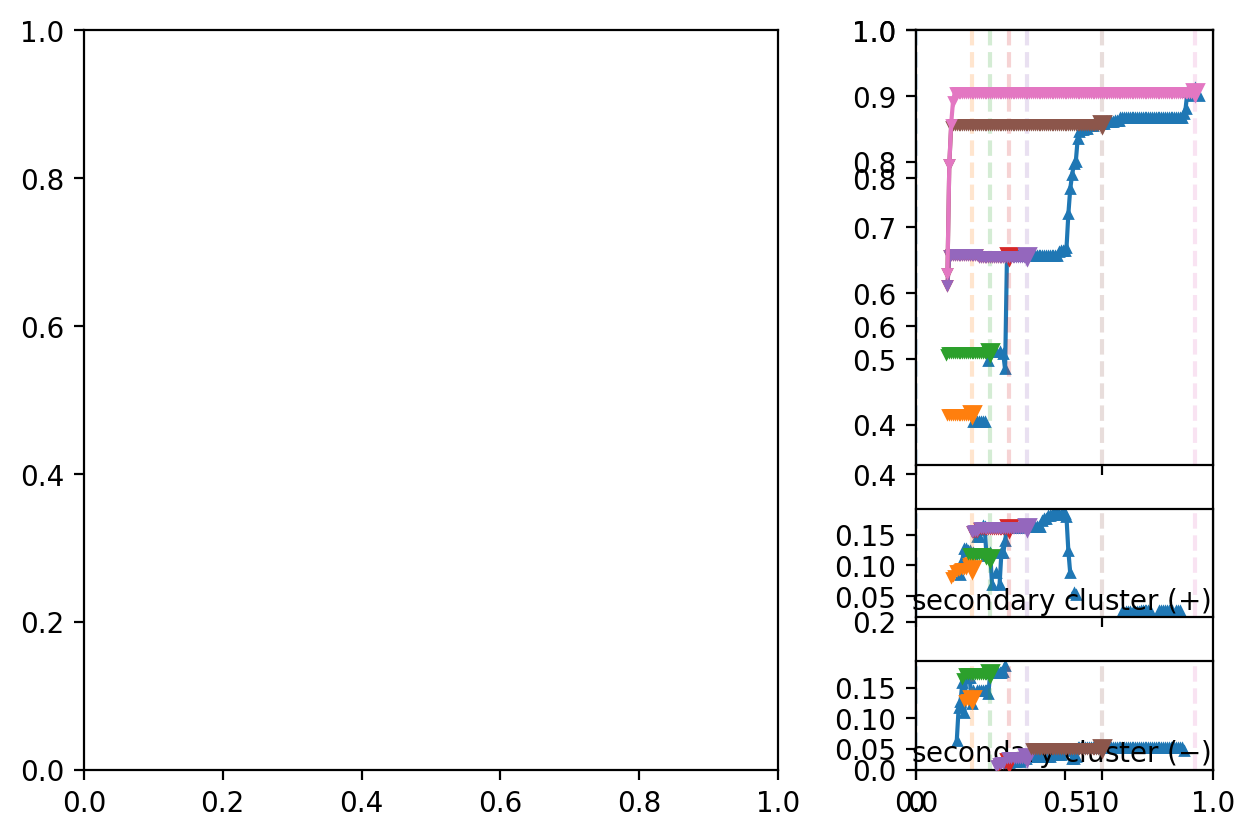

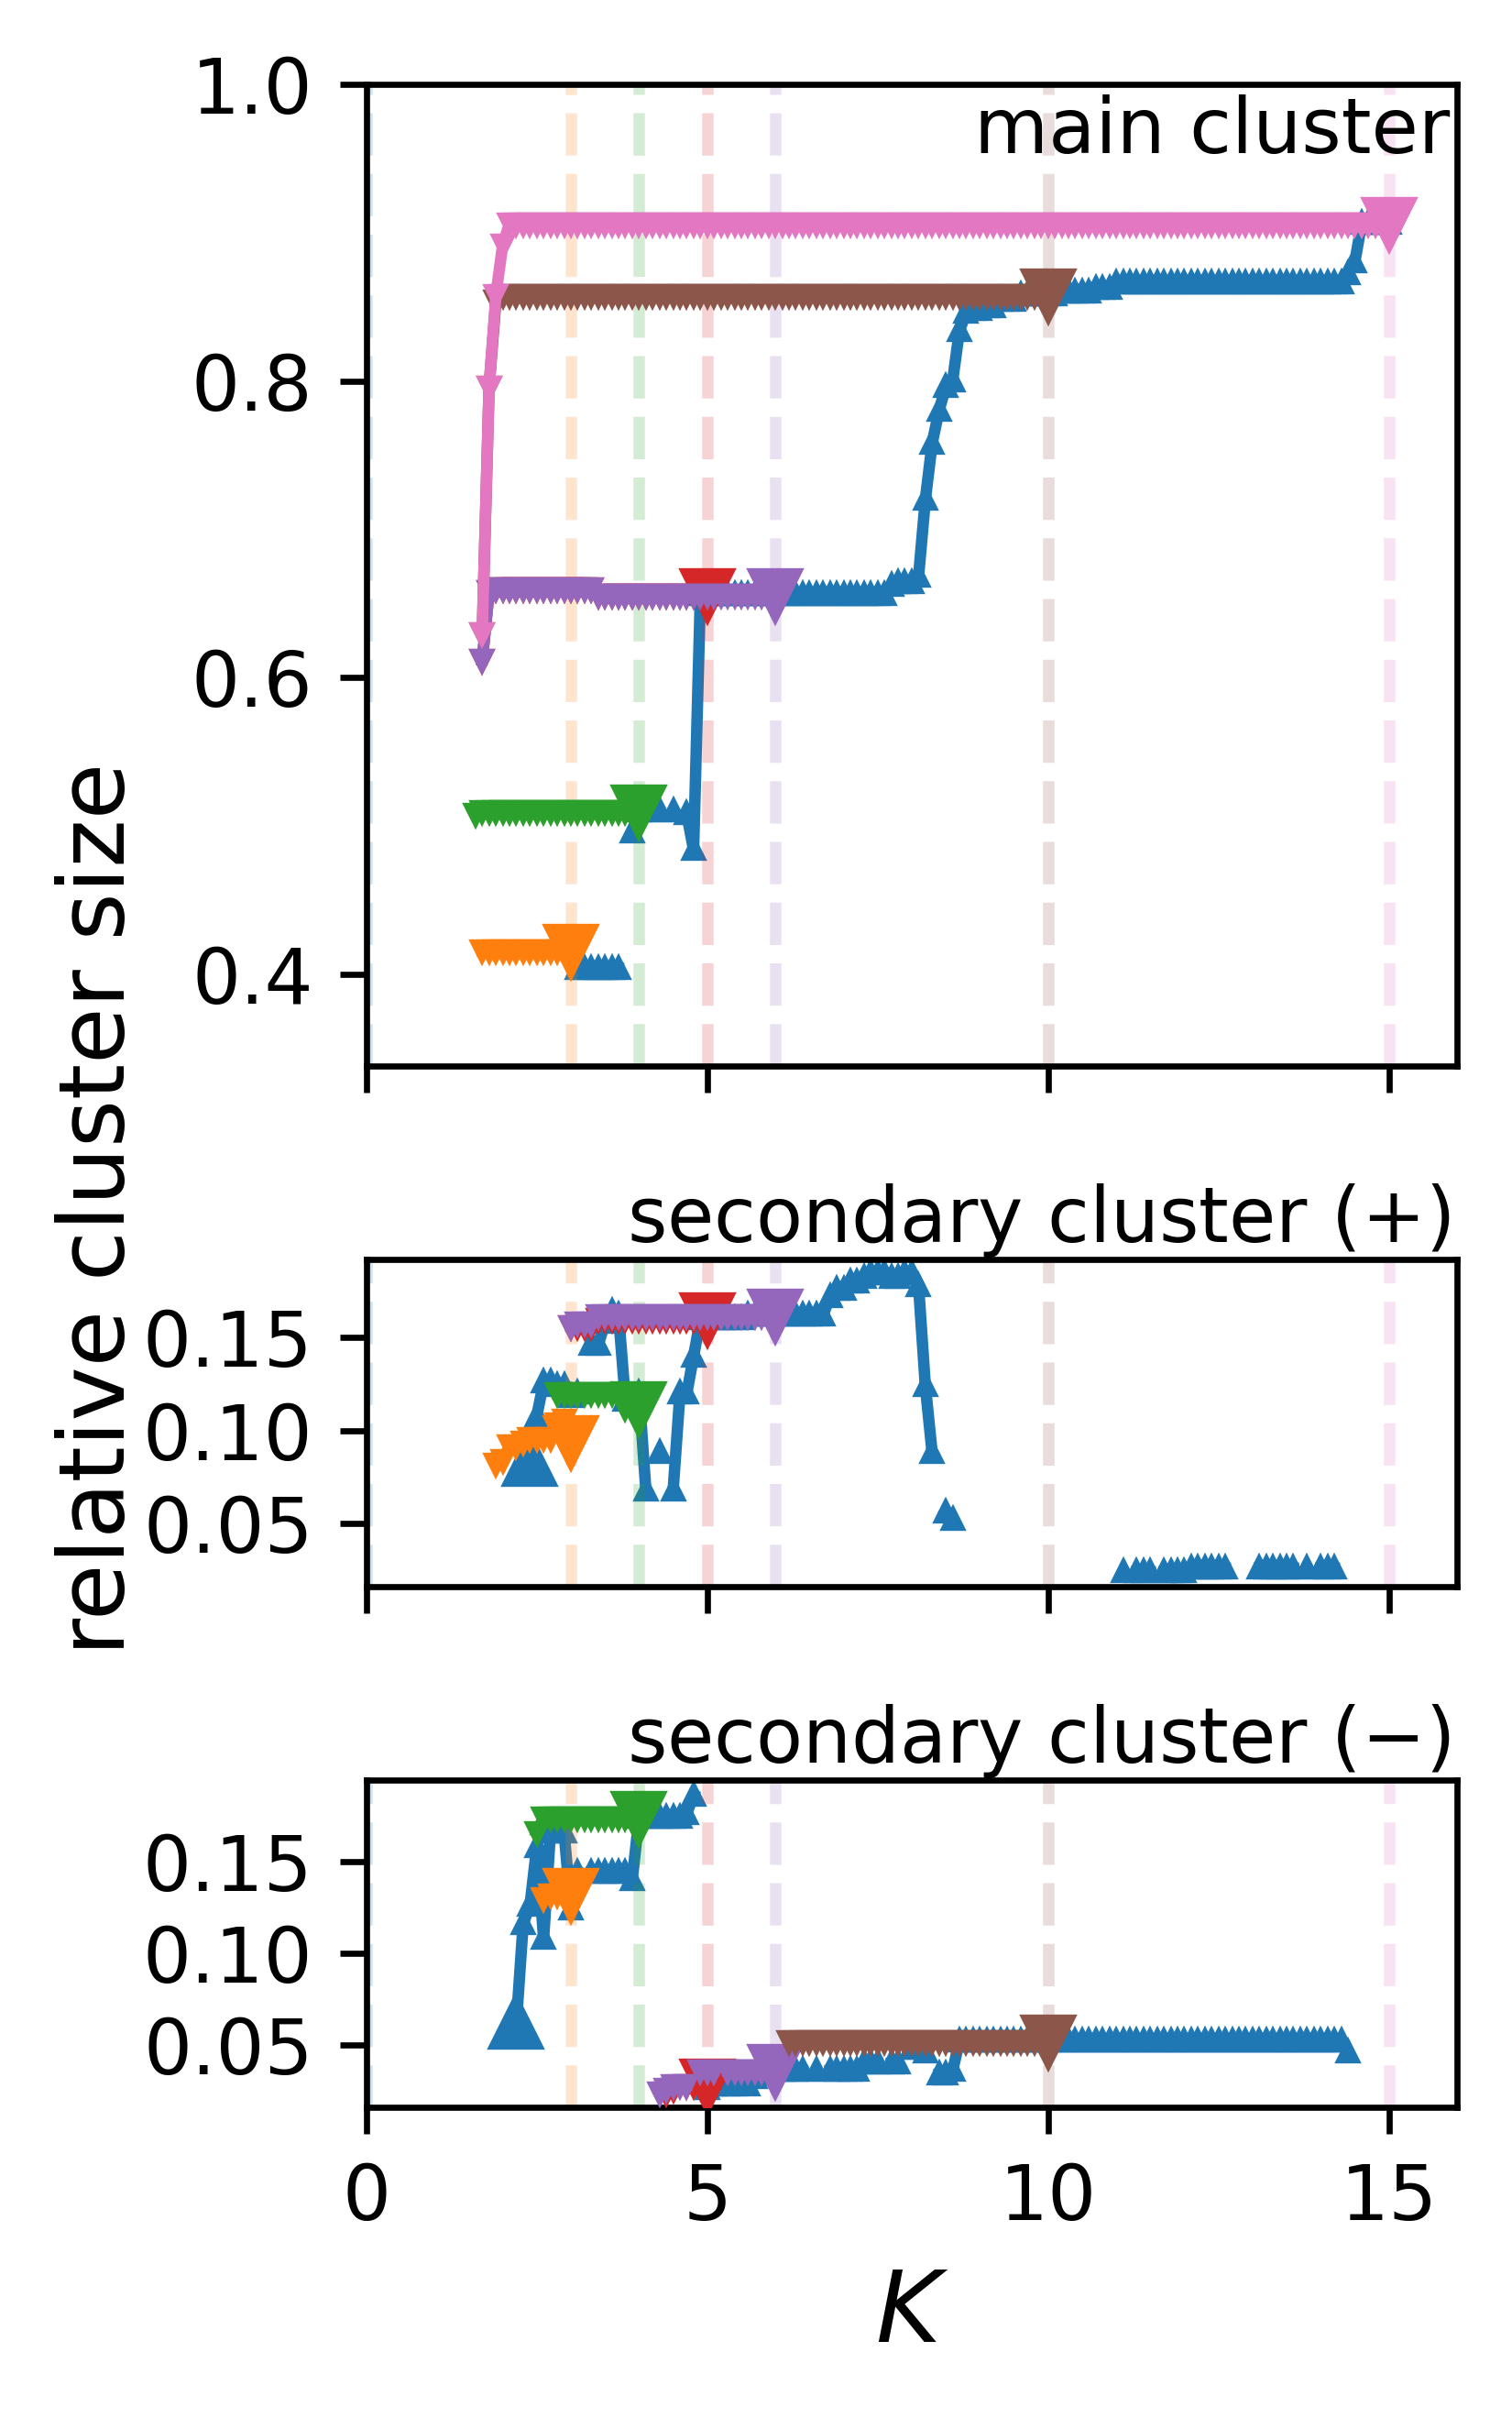

In [ ]:
fig  = plt.figure(figsize=(3,4.5),dpi=300)
axs = fig.subplots(3,1,height_ratios=[3,1,1],sharex=True)
ms = df.reset_index().m.unique()
re_df = df.reset_index()
markers = ['^']+['v']*len(K_backs)
d_ = [0]+[-1]*len(K_backs)
# markers = ['.']+[',']*len(K_backs)
TO_DRAW = ['main_s','p_s_0','m_s_0']
TEXT = ['main cluster',r'secondary cluster $(+)$',r'secondary cluster $(-)$']
# for to_d, ax,text in zip(TO_DRAW,axs,TEXT):
num = 0
num_c = 0
plt.sca(ax)
for to_d, ax,text in zip(TO_DRAW,axs,TEXT):
    num = 0
    num_c = 0
    plt.sca(ax)
    for i,(K_back,df_b) in enumerate(list(df_new_dict.items())):

        ms = df_b.reset_index().m.unique()
        re_df = df_b.reset_index()

        df_m = re_df[re_df.m == m_to_draw]
        Ks = df_m.K.to_numpy()
        rs = df_m[to_d].to_numpy()/N
        rstd = df_m.rstd.to_numpy()
        rMM= df_m.rMM.to_numpy()
        plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
        l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num)
        m,=plt.plot(Ks[::1],rs[::1],markers[i],color = tab_color_list[num_c],zorder= num,markersize=2)

        not_nan, = np.where(~np.isnan(rs))
        if len(not_nan)!=0:
            not_nan_first = not_nan[d_[i]] 
            _,=plt.plot(Ks[not_nan_first],rs[not_nan_first],markers[i],color = tab_color_list[num_c],zorder= num,markersize=6)
        num +=1
        num_c +=1
        B_element = (l,m,f)
        B_label = K_back
        B_legends.append(B_element)
        min_,max_ = plt.gca().get_ylim()
    print(min_)
    plt.text(16-0.1,max_,text,horizontalalignment='right',verticalalignment='bottom')

axs[0].set_ylim(0.3382,1)
ax =plt.gca()
# plt.ylim(0,1)
plt.xlim(0,16)



# plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
fig.supylabel(r'relative cluster size',x=0.1)
axs[-1].set_xlabel(r'$K$',fontsize=13)
fig.tight_layout()


In [ ]:
idx_, =np.where(np.isnan(rs))

0.3382
0.0317
0.0157


Text(0.5, 0.01, '$K$')

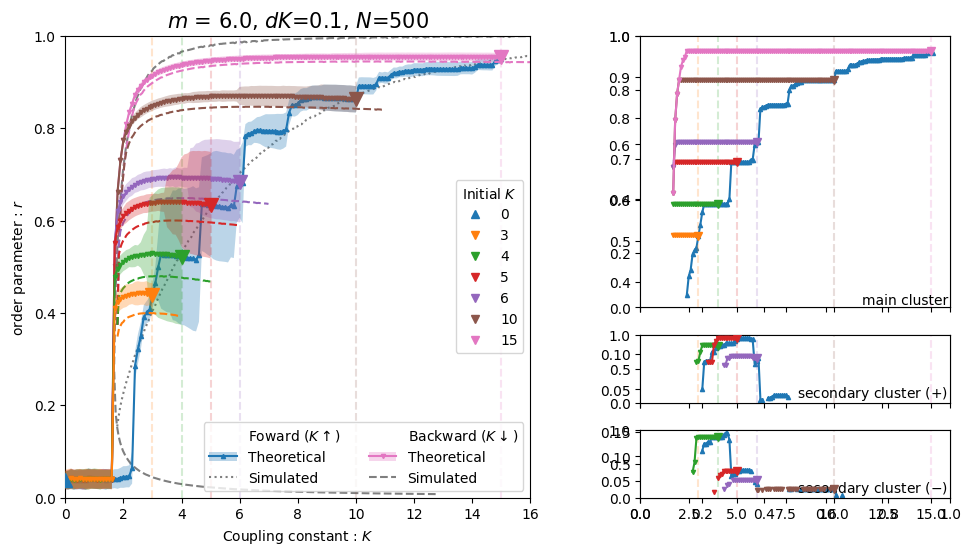

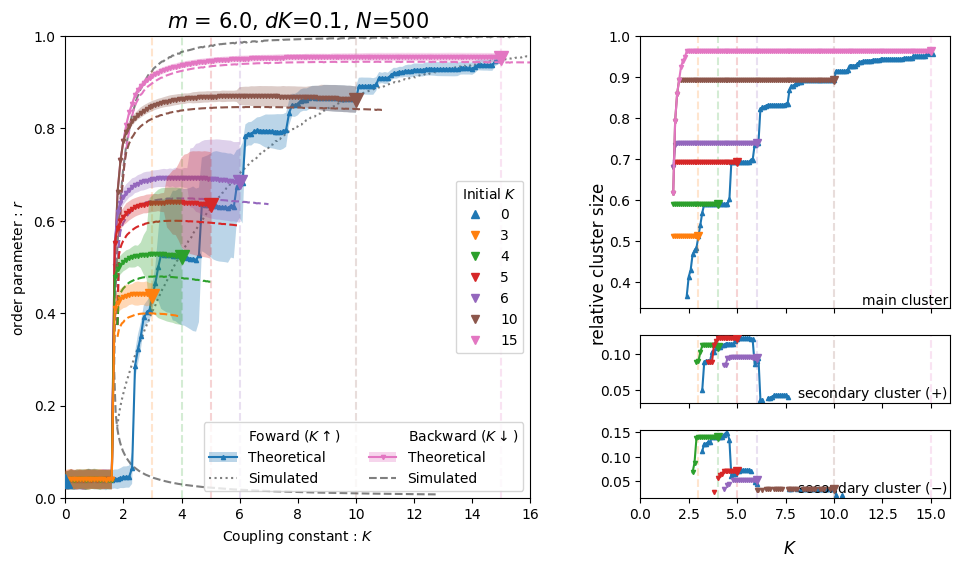

In [ ]:
fig = plt.figure(figsize=(10,6))
fig_r,fig_s = fig.subfigures(1,2,wspace=1,width_ratios=[6,4])
ax = fig_r.subplots(1)


ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()
plt.sca(ax)
lf,= plt.plot(Ks,rs,'-',label=r'$K_{forward}$',color = 'tab:blue')
_,= plt.plot(Ks[0],rs[0],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=10,zorder=10)
mf,= plt.plot(Ks[:],rs[:],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=3)
ff = plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)
plt.legend([(lf,ff)],K_backs,title=f'Backward')

backs_r = []
backs_K = []
num = len(df_b_dick)+1
num_c = 1
B_legends = []
B_legends2 = ()
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    backs_K.append(Ks[-1])
    backs_r.append(rs[-1])
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
    l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
    m,=plt.plot(Ks[:],rs[:],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
    _,=plt.plot(Ks[-1],rs[-1],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=10)
    Ku,Ru = U_sets_op_B[K_back]
    if type(Ku)== float:
        plt.plot(Ku,Ru,':',color = tab_color_list[num_c],zorder= num)
    else: 
        Ku_ = Ku[Ku<K_back+1] 
        Ru_ = Ru[Ku<K_back+1] 
        plt.plot(Ku_,Ru_,linestyle='--',color = tab_color_list[num_c],zorder= num)
    f=plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num)
    num -=1
    num_c +=1
    B_element = (l,m,f)
    B_label = K_back
    B_legends.append(B_element)
ax = plt.gca()
plt.legend(B_legends,K_backs,title=f'Backward')#,handler_map={tuple: HandlerTuple(ndivide=None)})



p0, = plt.plot(np.nan,np.nan,'^',color=tab_color_list[0])
p1, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[1])
p2, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[2])
p3, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[3])
p4, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[4])
p5, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[5])
p6, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[6])

string = ', '.join(map(str,K_backs))
ax =plt.gca()

plt.xlim(0,16)
plt.ylim(0,1)
p_F, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
p_B, = plt.plot([0],  marker='None',
        linestyle='None', label='dummy-empty')
categories = ['Theoretical', 'Simulated']

F_, = plt.plot(*KR_underK(F_new,16),':',color ='tab:gray',zorder=0)
B_, = plt.plot(*KR_underK(BU,16),linestyle='--',color = 'tab:gray',zorder=0)
plt.plot(*KR_underK(BO,16),linestyle='--',color = 'tab:gray',zorder=0)
leg3 = plt.legend([p_F,(lf,mf,ff),F_, p_B, (l,m,f), B_],
                    [r'Foward ($K\uparrow$)'] + categories + [r'Backward ($K\downarrow$)'] + categories,
                    loc = 4,ncol=2)
leg_c = plt.legend([p0,p1,p2,p3,p4,p5,p6],[0]+K_backs,loc=5,title=r'Initial $K$')


ax.add_artist(leg3)
plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
plt.ylabel(r'order parameter : $r$')
plt.xlabel(r'Coupling constant : $K$')
# plt.tight_layout()



ms = df.reset_index().m.unique()
re_df = df.reset_index()

axs = fig_s.subplots(3,1,height_ratios=[4,1,1],sharex=True)

markers = ['^']+['v']*len(K_backs)
# markers = ['.']+[',']*len(K_backs)
TO_DRAW = ['main_s','p_s_0','m_s_0']
TEXT = ['main cluster',r'secondary cluster $(+)$',r'secondary cluster $(-)$']
for to_d, ax,text in zip(TO_DRAW,axs,TEXT):
    num = 0
    num_c = 0
    plt.sca(ax)
    for i,(K_back,df_b) in enumerate(list(df_new_dict.items())):

        ms = df_b.reset_index().m.unique()
        re_df = df_b.reset_index()

        df_m = re_df[re_df.m == m_to_draw]
        Ks = df_m.K.to_numpy()
        rs = df_m[to_d].to_numpy()/N
        rstd = df_m.rstd.to_numpy()
        rMM= df_m.rMM.to_numpy()
        plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
        l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
        m,=plt.plot(Ks[::1],rs[::1],markers[i],color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
        _,=plt.plot(Ks[-1],rs[-1],markers[i],color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=6)
        num +=1
        num_c +=1
        B_element = (l,m,f)
        B_label = K_back
        B_legends.append(B_element)
        min_,_ = plt.gca().get_ylim()
    print(min_)
    plt.text(16-0.1,min_,text,horizontalalignment='right',verticalalignment='bottom')
# ax = plt.gca()

axs[0].set_ylim(0.3382,1)
ax =plt.gca()
# plt.ylim(0,1)
plt.xlim(0,16)



# plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
fig_s.supylabel(r'relative cluster size',x=0)
fig_s.supxlabel(r'$K$')
# fig.tight_layout()


NameError: name 'min_' is not defined

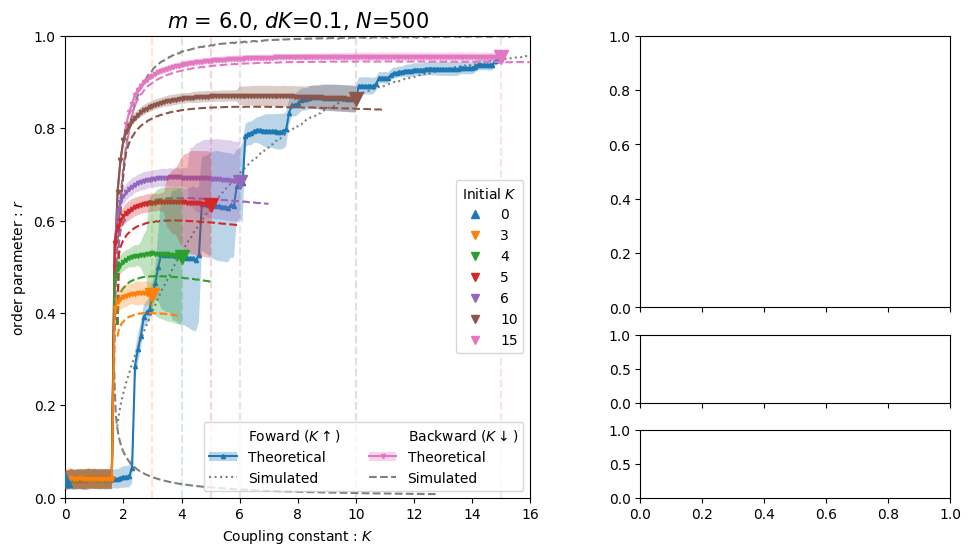

In [20]:
ms = df.reset_index().m.unique()
re_df = df.reset_index()

fig, axs = plt.subplots(3,1,height_ratios=[3,1,1],sharex=True,figsize=(3,4.5),dpi=100)
fig.clear()
markers = ['^']+['v']*len(K_backs)
# markers = ['.']+[',']*len(K_backs)
TO_DRAW = ['main_s','p_s_0','m_s_0']
TEXT = ['main cluster',r'secondary cluster $(+)$',r'secondary cluster $(-)$']
# for to_d, ax,text in zip(TO_DRAW,axs,TEXT):
num = 0
num_c = 0
plt.sca(ax)
print(min_)
plt.text(16-0.1,max_,text,horizontalalignment='right',verticalalignment='bottom')
# ax = plt.gca()

axs[0].set_ylim(0.3382,1)
ax =plt.gca()
# plt.ylim(0,1)
plt.xlim(0,16)



# plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
fig.supylabel(r'relative cluster size',x=0.1)
axs[-1].set_xlabel(r'$K$',fontsize=13)
fig.tight_layout()


### check detail

In [2]:
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_not0 as mf2_sets_TLO
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2
max_c = 3e-4

In [3]:
def make_new_df(K_start,m_start,N = 500):
    cols ={'r':[0],'rmin':[0],'rmax':[0],'rstd':[0],'rMM':[0],'error':[0]}
    theta_col = []
    dtheta_col = []
    for i in range(10):
        cols[f'c{i}'] = np.nan
    for i in range(10):
        cols[f'c{i} phase vel'] = np.nan
    for i in range(10):
        cols[f'c{i} omega'] = np.nan
    for i in range(10):
        cols[f'c{i} list'] = np.nan

    for i in range(N):
        s = 'theta'+f'{i}'.zfill(3)
        theta_col.append(s)
        cols[s]= np.nan

    for i in range(N):
        s = 'dtheta'+f'{i}'.zfill(3)
        dtheta_col.append(s)
        cols[s]= np.nan
    cols['avg_dtheta']= np.nan
    cols['K'] = K_start
    cols['m'] = m_start
    df = pd.DataFrame(columns=cols.keys())
    df_Km = df.set_index(['K','m'])
    for i in range(10):
        df_Km[f'c{i} list'] =df_Km[f'c{i} list'].astype(object)
    df_Km['avg_dtheta'] = df_Km['avg_dtheta'].astype(object)
    return df_Km,theta_col,dtheta_col

In [4]:
def hysterisis(df_Km,sets,theta_col,dtheta_col,K,m,N,omega):
    theta,dtheta,rs = sets
    r_duration = rs[-5000:]
    r = np.mean(r_duration,axis=0)
    rmin = np.min(r_duration,axis=0)
    rmax = np.max(r_duration,axis=0)
    rstd = np.std(r_duration,axis=0)
    rMM = (np.max(r_duration,axis=0)-np.min(r_duration,axis=0))

    sum_time = 1500
    dtheta_c = np.cumsum(dtheta,axis=0)
    avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

    c_threshold = np.where(r<0.05,1e-5,max_c)
    CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(AVG=avg_dtheta,check=c_threshold,c_size=5,N=N,omega=omega)
    dtype = [('cluster size', int), ('cluster mean phase velocity', float)]
    dtype2 = [('cluster size', int), ('cluster mean natural frequency', float)]
    CSMP = np.array([(S,P) for S,P in zip(CS,CMP)],dtype=dtype)
    CSMO = np.array([(S,O) for S,O in zip(CS,CMO)],dtype=dtype2)
    cluster = np.array(cluster)
    last_theta = theta[-1]
    last_dtheta = dtheta[-1]
    df_Km.loc[(K,m),"r"] = r
    df_Km.loc[(K,m),"rmin"] = rmin
    df_Km.loc[(K,m),"rmax"] = rmax
    df_Km.loc[(K,m),"rstd"] = rstd
    df_Km.loc[(K,m),"rMM"] = rMM
    df_Km.loc[(K,m),'error'] = np.nan
    for i in range(len(CSMO)):
        df_Km.loc[(K,m),f'c{i}'] = CSMP['cluster size'][i]
        df_Km.loc[(K,m),f'c{i} phase vel'] = CSMP['cluster mean phase velocity'][i]
        df_Km.loc[(K,m),f'c{i} omega'] = CSMO['cluster mean natural frequency'][i]
        df_Km.loc[(K,m),f'c{i} list'] = ' '.join(map(str,cluster[i]))
    df_Km.loc[(K,m),'avg_dtheta'] = ' '.join(map(str,avg_dtheta[-1]))
    df_Km.loc[(K,m),theta_col] = last_theta
    df_Km.loc[(K,m),dtheta_col] = last_dtheta
    return (last_theta,last_dtheta)

In [5]:
def TLO(m,theta_init,dtheta_init,omega,Ks,N,t_end=500,dt = 0.1):
    df_Km,theta_col,dtheta_col = make_new_df(0,m,N = N)
    t = np.arange(0,t_end,dt)
    K = Ks[0]
    theta_dict = {}
    dtheta_dict = {}

    theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_init,p_dtheta= dtheta_init,p_omega=omega,result_time = int((t_end)-(350))*int(1/dt))
    theta_dict[K] = theta
    dtheta_dict[K] = dtheta
    if m == 0:
        dtheta = np.c_[dtheta[0],dtheta.T].T
    last_theta,last_dtheta = hysterisis(df_Km,(theta, dtheta,rs),theta_col,dtheta_col,K,m,N,omega)
    for K in Ks[1:]:
        theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=last_theta,p_dtheta= last_dtheta,p_omega=omega,result_time = int((t_end)-(350))*int(1/dt))
        theta_dict[K] = theta
        dtheta_dict[K] = dtheta
        if m == 0:
            dtheta = np.c_[dtheta[0],dtheta.T].T
        last_theta,last_dtheta = hysterisis(df_Km,(theta, dtheta,rs),theta_col,dtheta_col,K,m,N,omega)
    return df_Km,theta_dict,dtheta_dict

In [9]:
seed = 10
N = 500
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega) - np.mean(omega)
ms = np.arange(0,10+0.05,0.1)
K = 0
m = 0
dK = 0.1
K_end = 15
Ks = np.arange(0,K_end+dK/2,dK)

df_Km,theta_col,dtheta_col = make_new_df(0,m,N = N)
df_Km = df_Km.reset_index()

In [10]:
df_Km,theta_dict,dtheta_dict = TLO(10,theta_init=theta_init,dtheta_init = 0*omega,omega=omega,Ks=Ks,N=N,t_end= 3000,dt = 0.1)

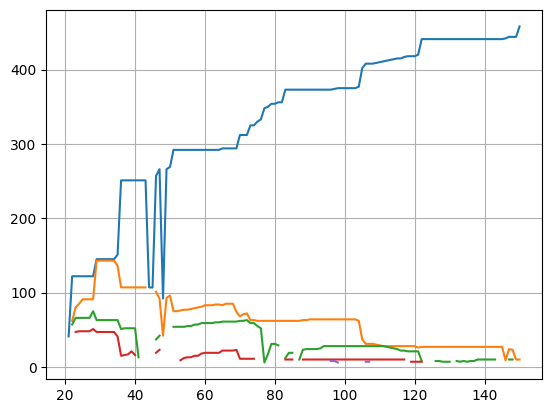

In [13]:
plt.plot(df_Km['c0'].to_numpy())
plt.plot(df_Km['c1'].to_numpy())
plt.plot(df_Km['c2'].to_numpy())
plt.plot(df_Km['c3'].to_numpy())
plt.plot(df_Km['c4'].to_numpy())
plt.grid()

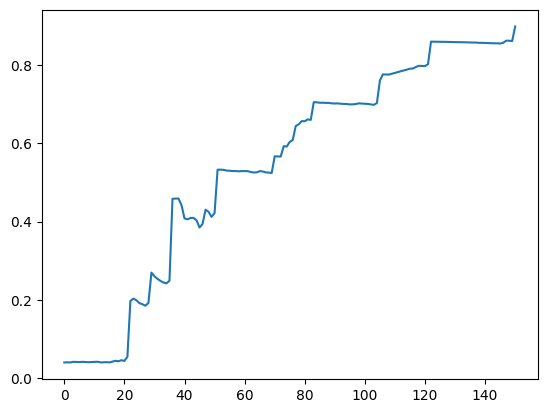

In [12]:
plt.plot(np.array(df_Km['r'].to_numpy()))

In [15]:
rstds = df_Km.reset_index()['rstd'].to_numpy()
Ks = df_Km.reset_index()['K'].to_numpy()
rs = df_Km.reset_index()['r'].to_numpy()
arg = np.argsort(rstds)[::-1]

In [16]:
Ks[np.argmax(rstds)]

2.9000000000000004

In [17]:
np.where(rs<0.15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),)

In [18]:
def Draw_Kr_idxs(m,idxs,ax,rs,rstds,Ks):
    data_rs = rs[idxs]
    data_rstd = rstds[idxs]
    data_Ks = Ks[idxs]
    plt.sca(ax)

    err_fw = plt.errorbar(data_Ks,data_rs,data_rstd,fmt='.',color='tab:red',zorder=2,capsize=4,elinewidth=2,capthick=3,ms=10)

In [19]:
df_Km

r      rmin      rmax      rstd       rMM error   c0   c1  \
K    m                                                                      
0.0  10  0.039435  0.000698  0.106609  0.020889  0.105911   NaN  NaN  NaN   
0.1  10  0.039843  0.000914  0.121801   0.02045  0.120888   NaN  NaN  NaN   
0.2  10  0.039478   0.00051  0.126675  0.020391  0.126165   NaN  NaN  NaN   
0.3  10  0.041154  0.000563  0.110183  0.020069  0.109619   NaN  NaN  NaN   
0.4  10  0.040932  0.000346  0.118763  0.021402  0.118417   NaN  NaN  NaN   
...           ...       ...       ...       ...       ...   ...  ...  ...   
14.6 10  0.857247  0.787113  0.951453  0.038209   0.16434   NaN  442    9   
14.7 10  0.862792  0.791674  0.956185  0.036946   0.16451   NaN  444   24   
14.8 10  0.862617   0.78675  0.959967  0.036891  0.173217   NaN  444   23   
14.9 10  0.861883  0.792259  0.956076  0.035822  0.163817   NaN  444   10   
15.0 10  0.899086   0.84952  0.966277  0.022641  0.116757   NaN  458   10   

          c2   c3  ... dtheta491 dtheta492 dtheta493 dtheta494 dtheta495  \
K    m             ...                                                     
0.0  10  NaN  NaN  ...  2.210857  2.288117  2.353115  2.353957  2.363694   
0.1  10  NaN  NaN  ...  2.210921  2.287899    2.3533  2.354017  2.363782   
0.2  10  NaN  NaN  ...  2.211395  2.286927  2.352702   2.35314  2.364447   
0.3  10  NaN  NaN  ...  2.212096  2.288013  2.352551  2.353047  2.363699   
0.4  10  NaN  NaN  ...  2.210886  2.288904  2.352718  2.353474  2.363357   
...      ...  ...  ...       ...       ...       ...       ...       ...   
14.6 10  NaN  NaN  ...  2.752486  2.822859  2.782526  2.781503  2.768737   
14.7 10   10  NaN  ...  2.090769  2.343973  2.544529  2.547026  2.575638   
14.8 10   10  NaN  ...   1.86226  1.767453  1.732435  1.732235   1.73041   
14.9 10  NaN  NaN  ...  2.163654  2.009535  1.893982   1.89258  1.876589   
15.0 10   10  NaN  ...  2.409748  2.182124  2.015644  2.013601  1.990177   

        dtheta496 dtheta497 dtheta498 dtheta499  \
K    m                                            
0.0  10  2.373316  2.434315  2.436641    2.6489   
0.1  10  2.373192  2.434121  2.436689  2.648942   
0.2  10  2.373881  2.433898  2.436575  2.648707   
0.3  10  2.372686  2.433936  2.437063   2.64915   
0.4  10  2.373485  2.434633  2.436074  2.649442   
...           ...       ...       ...       ...   
14.6 10   2.75437   2.61537  2.608068  2.106604   
14.7 10  2.603466  2.765958  2.771506  2.912691   
14.8 10  1.729511  1.748475  1.750248  2.466137   
14.9 10  1.861167  1.772558  1.769453  2.354999   
15.0 10  1.967341  1.827642  1.822401  2.111966   

                                                avg_dtheta  
K    m                                                      
0.0  10  -3.235411332449075 -3.0106067591805186 -2.4265...  
0.1  10  -3.2354070131653043 -3.0106123081763925 -2.426...  
0.2  10  -3.2354138804237738 -3.0106061803895265 -2.426...  
0.3  10  -3.235423017199756 -3.010598054591521 -2.42658...  
0.4  10  -3.2353940833657218 -3.010621339615088 -2.4265...  
...                                                    ...  
14.6 10  -3.2177631886128224 -2.9821453934159883 -2.373...  
14.7 10  -3.2157000437858185 -2.9711581264789872 -2.376...  
14.8 10  -3.217077830437576 -2.978793380912051 -2.37193...  
14.9 10  -3.207357168942413 -2.977858042254057 -2.37652...  
15.0 10  -3.2009104891725597 -3.0012751345040463 -2.346...  

[151 rows x 1047 columns]

In [20]:
arg

array([ 29,  30,  31,  32,  38,  37,  33,  36,  39,  34,  66,  65,  63,
        67,  64,  68,  62,  61,  60,  69,  35,  59,  40,  72,  58,  71,
        57,  56,  55,  70,  50,  54,  49,  53,  52,  51,  47,  25,  73,
        46,  28,  74,  24,  48,  23,  42,  75,  26,  43,  41,  76,  44,
        45,  27,  77,  99,  96, 100,  98,  95,  94, 101,  97, 102, 103,
        78,  93, 104,  91,  92,  90,  80,  79,  89,  81,  82,  88,  22,
        87,  84,  86,  85,  83, 105, 108, 109, 107, 106, 110, 111, 112,
       113, 114, 115, 116, 120, 119, 117, 118, 121, 138, 139, 129, 140,
       130, 143, 131, 142, 133, 134, 127, 145, 144, 141, 132, 135, 137,
       136, 128, 126, 125, 123, 122, 124, 146, 147, 148, 149,  21,  19,
        20, 150,  18,  17,   4,  10,   7,   9,  15,   0,  12,  14,   1,
         2,  13,   8,   6,  16,  11,   5,   3])

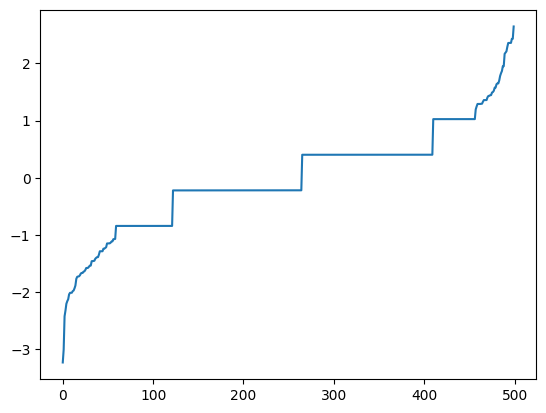

In [23]:
array_ =np.array(df_Km['avg_dtheta'].loc[(Ks[arg][0],10)].split(' '),dtype=float)
arg_ = np.argsort(array_)
plt.plot(array_[arg_])

# Ks[arg]

In [335]:
Ks[arg]

array([ 4. ,  4.8,  3.2,  4.6,  4.7,  2.6,  3.5,  3.7,  4.2,  3.6,  3.3,
        2.7,  4.3,  8. ,  4.1,  3.4,  4.5,  2.8,  7.5,  7.4,  7.9,  7.3,
        4.4,  7.8,  7.7,  3.8,  7.6,  8.1,  2.9,  7.2,  7.1,  6.9,  7. ,
        2.5,  6.8,  6.1,  6.2,  6.3,  6.7,  6. ,  6.4,  6.5,  6.6,  5.8,
        5.9,  5.7,  5.6,  5.5,  5.4,  5.3,  5.2,  5.1,  5. ,  4.9,  3.9,
        3. ,  8.2,  3.1,  2.4,  2.3,  8.3,  8.4, 12.6, 12.2, 12.3, 12.4,
       12.5, 12.1, 12.7, 13.1, 12.9, 13.6, 13.8, 13.2, 13.3, 13.5, 13. ,
       12.8, 13.4, 13.7, 14. , 13.9, 14.3, 14.2, 14.1, 12. , 11.8, 11.7,
       11.6, 11.9, 11.4, 11.2, 11.3, 11.1, 11.5, 11. , 10.8, 10.7, 10.9,
       14.4, 10.2, 10.3, 10.6, 10.4, 10.1, 10.5, 10. ,  9.9,  9.4,  9.8,
        9.7,  9.6,  9.5,  9.3,  9. ,  9.2, 14.5,  8.7,  9.1,  8.5,  8.9,
        8.8,  2.2,  8.6,  2.1, 14.9, 14.8, 14.7, 15. ,  2. , 14.6,  1.8,
        1.9,  0.3,  0.6,  0.7,  1. ,  1.1,  0.2,  0.8,  1.5,  1.7,  1.3,
        1.2,  0.4,  1.4,  0.1,  0.5,  1.6,  0. ,  0

In [ ]:
theta_dict.keys()

In [97]:
2.3000000000000003

2.3000000000000003

Text(0.1, 0.5, '$j^{th}$ oscillator')

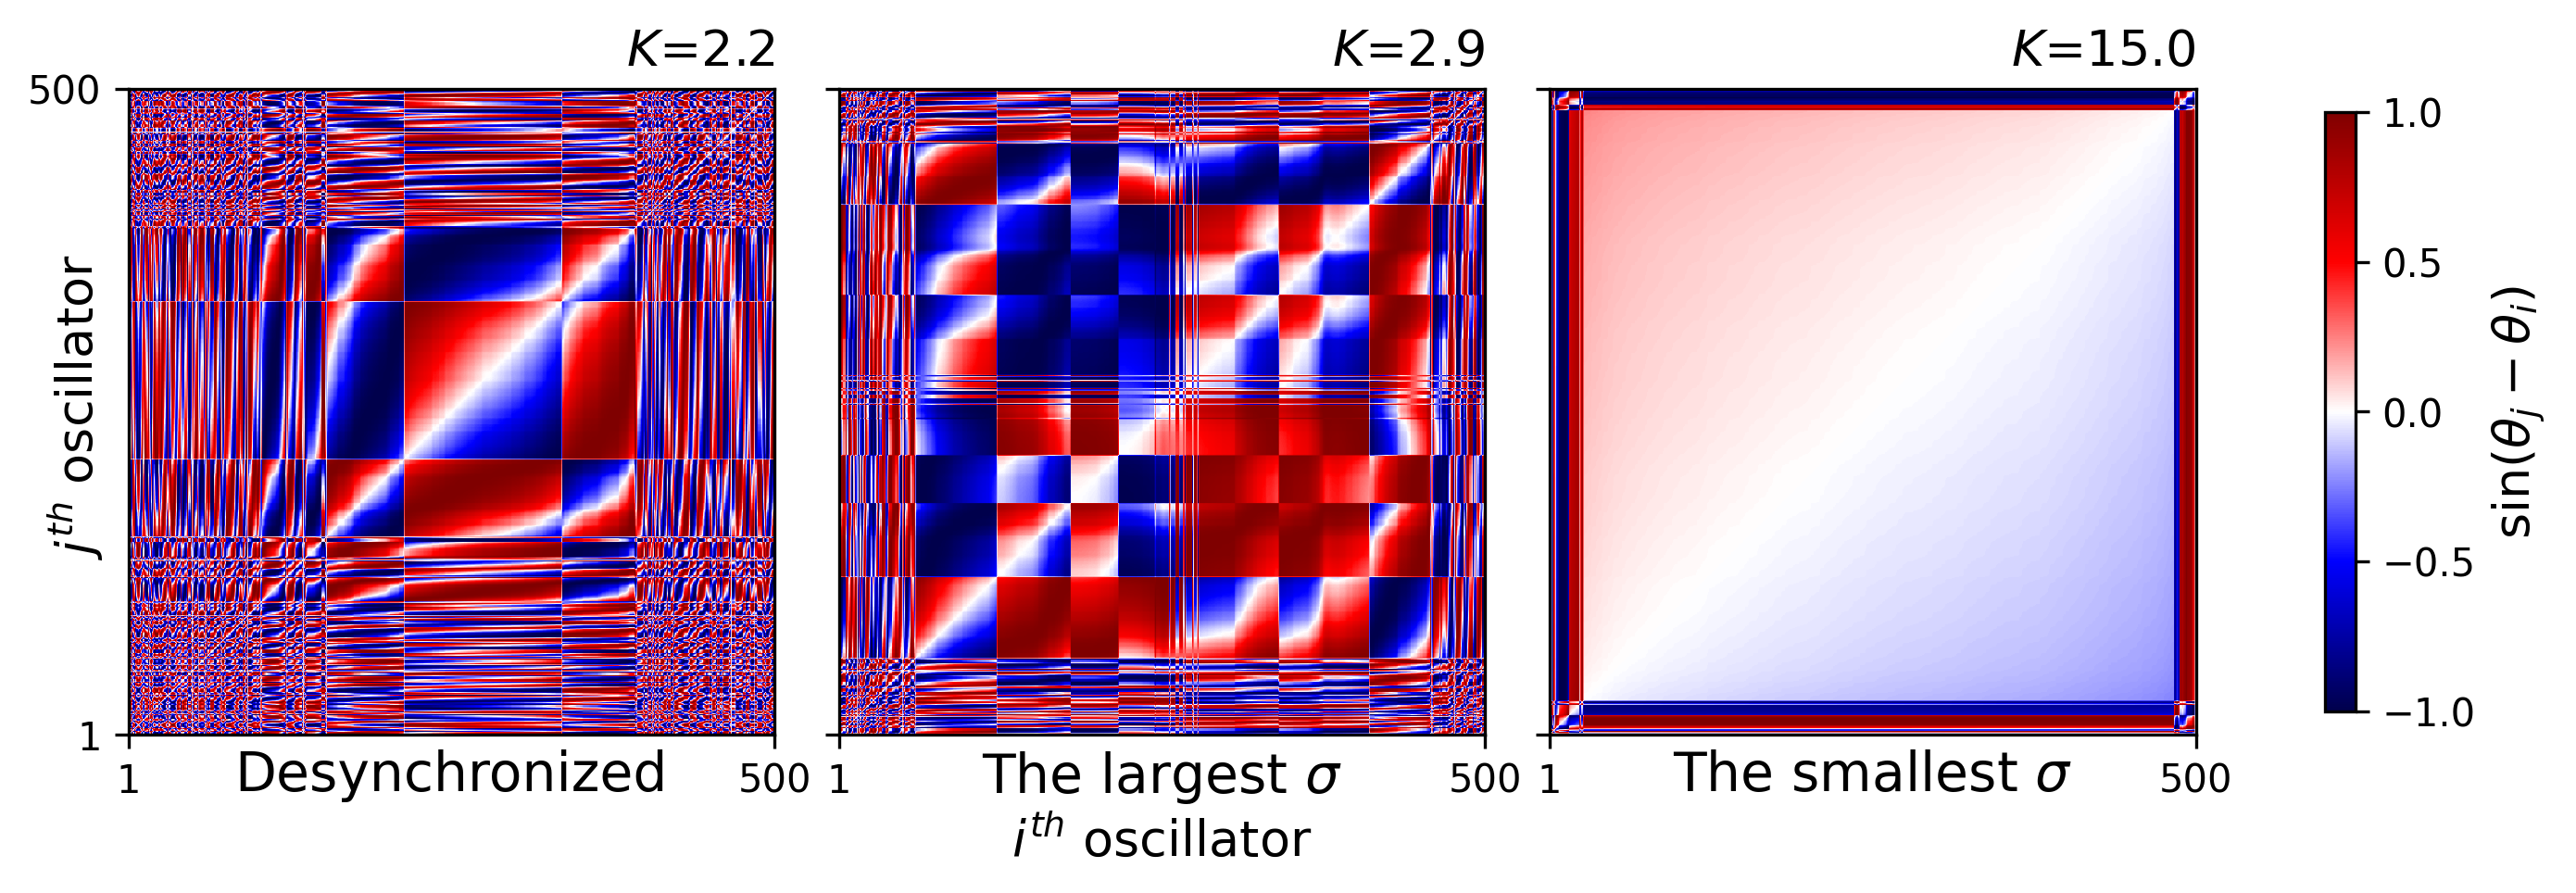

In [24]:
fig = plt.figure(figsize=(12,3.5),dpi=300)
axs = fig.subplots(1,3,sharex=True,sharey=True)
# K_wants = [2.3000000000000003,4.4,15.0]
K_wants = [2.2,Ks[29],15.0]
for K_want,ax in zip(K_wants,axs[:3]):
    plt.sca(ax)
    theta = theta_dict[K_want]
    rs = np.abs(1/N * np.sum(np.exp(1j*theta),axis=1))
    A = np.mean(rs)
    A_min = np.searchsorted(rs[:100],A)
    seg_theta = theta[A_min]
    i,j = np.meshgrid(seg_theta,seg_theta)
    im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,origin='lower',cmap = 'seismic',aspect=1,extent=[1,500,1,500])

    plt.xticks([1,500])
    plt.yticks([1,500])
    plt.title(r'$K$='+f'{K_want:.1f}',fontsize=13,loc='right')


plt.sca(axs[0])
# plt.xlabel('Desynchronized',y=0.3)
plt.text(250,-10,'Desynchronized',horizontalalignment='center', verticalalignment='top',fontsize=14)
plt.sca(axs[1])
plt.text(250,-10,r'The largest $\sigma$',horizontalalignment='center', verticalalignment='top',fontsize=14)
plt.sca(axs[2])
plt.text(250,-10,r'The smallest $\sigma$',horizontalalignment='center', verticalalignment='top',fontsize=14)

# plt.xlabel(r'The smallest $\sigma$',y=0.3)
# plt.ylabel(r'$j^{th}$ oscillator',fontsize=13)
plt.subplots_adjust(wspace=0.1)
cbar = plt.colorbar(im,ax=axs,shrink=0.8)
cbar.set_label(r'$\sin(\theta_j-\theta_i)$',fontsize=13)
plt.sca(axs[1])
plt.xlabel(r'$i^{th}$ oscillator',fontsize=13)
fig.supylabel(r'$j^{th}$ oscillator',fontsize=13,x=0.1)
# plt.tight_layout()

In [ ]:
rstds50

In [ ]:
plt.plot(rstds)

In [ ]:
data_rstd

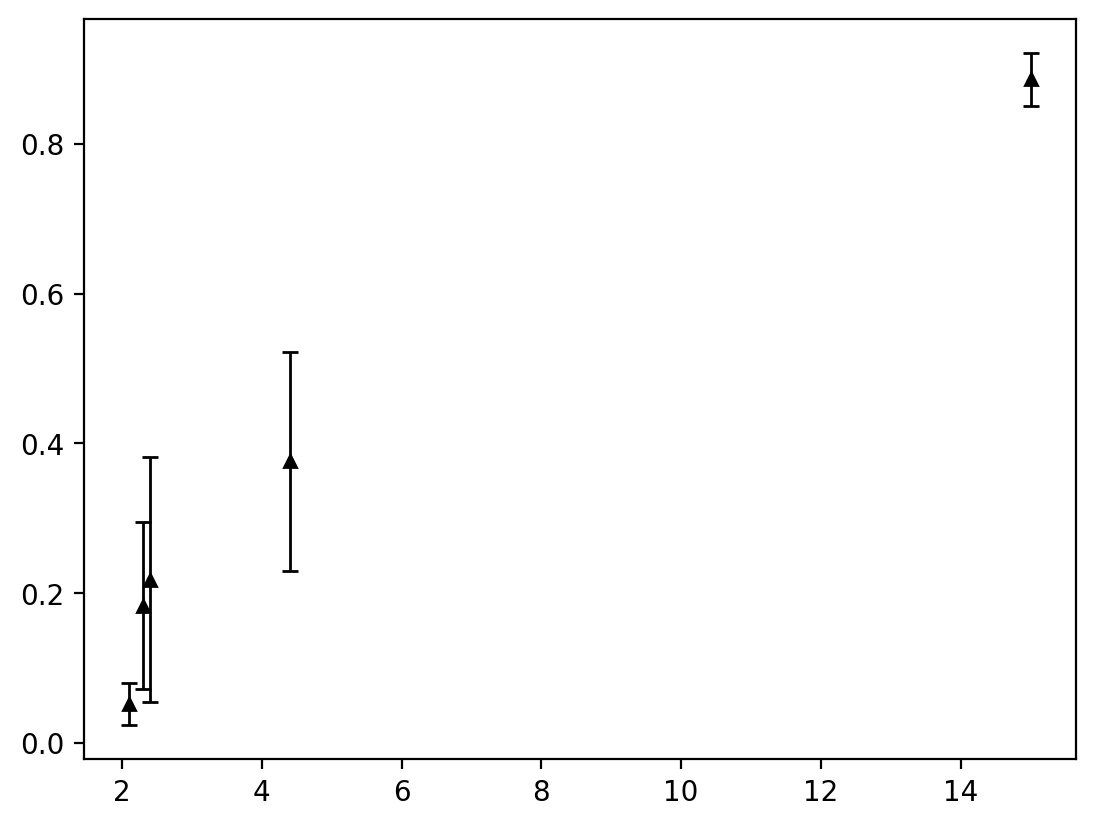

In [327]:
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()

idxs = np.array([21,23,24,44,150])
data_rs = rs[idxs]
data_rstd = rstds[idxs]
data_Ks = Ks[idxs]


err_fw = plt.errorbar(data_Ks,data_rs,data_rstd,fmt='^',color='black',zorder=20,capsize=3,elinewidth=1,capthick=1,ms=4)

In [20]:
plt.figure(figsize=(6,4.5),dpi=300)
ms = df.reset_index().m.unique()
re_df = df.reset_index()

df_m = re_df[re_df.m == m_to_draw]
Ks = df_m.K.to_numpy()
rs = df_m.r.to_numpy()
rstd = df_m.rstd.to_numpy()
rMM= df_m.rMM.to_numpy()


idxs = np.array([23,44,150])
data_rs = rs[idxs]
data_rstd = rstds[idxs]
data_Ks = Ks[idxs]


err_fw = plt.errorbar(data_Ks,data_rs,data_rstd,fmt='^',color='black',zorder=20,capsize=3,elinewidth=1,capthick=1,ms=4)


lf,= plt.plot(Ks,rs,'-',label=r'$K_{forward}$',color = 'tab:blue')
_,= plt.plot(Ks[0],rs[0],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=10,zorder=10)
mf,= plt.plot(Ks[:],rs[:],'^',label=r'$K_{forward}$',color = 'tab:blue',markersize=3)
ff = plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3)
plt.legend([(lf,ff)],K_backs,title=f'Backward')

backs_r = []
backs_K = []
num = len(df_b_dick)+1
num_c = 1
B_legends = []
B_legends2 = ()
for K_back,df_b in df_b_dick.items():

    ms = df_b.reset_index().m.unique()
    re_df = df_b.reset_index()

    df_m = re_df[re_df.m == m_to_draw]
    Ks = df_m.K.to_numpy()
    rs = df_m.r.to_numpy()
    backs_K.append(Ks[-1])
    backs_r.append(rs[-1])
    rstd = df_m.rstd.to_numpy()
    rMM= df_m.rMM.to_numpy()
    plt.axvline(K_back,ls= '--',color = tab_color_list[num_c],alpha=0.2)   
    l,=plt.plot(Ks,rs,'-',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}')
    m,=plt.plot(Ks[:],rs[:],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=3)
    _,=plt.plot(Ks[-1],rs[-1],'v',color = tab_color_list[num_c],zorder= num,label=r'$K_{backward}$='+f'{K_back:.02f}',markersize=10)
    Ku,Ru = U_sets_op_B[K_back]
    if type(Ku)== float:
        plt.plot(Ku,Ru,':',color = tab_color_list[num_c],zorder= num)
    else: 
        Ku_ = Ku[Ku<K_back+1] 
        Ru_ = Ru[Ku<K_back+1] 
        plt.plot(Ku_,Ru_,linestyle='--',color = tab_color_list[num_c],zorder= num)
    f=plt.fill_between(Ks,rs-rstd,rs+rstd,alpha=0.3,zorder= num)
    num -=1
    num_c +=1
    B_element = (l,m,f)
    B_label = K_back
    B_legends.append(B_element)
ax = plt.gca()
plt.legend(B_legends,K_backs,title=f'Backward')#,handler_map={tuple: HandlerTuple(ndivide=None)})



p0, = plt.plot(np.nan,np.nan,'^',color=tab_color_list[0])
p1, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[1])
p2, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[2])
p3, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[3])
p4, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[4])
p5, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[5])
p6, = plt.plot(np.nan,np.nan,'v',color=tab_color_list[6])

string = ', '.join(map(str,K_backs))
ax =plt.gca()

plt.xlim(0,16)
plt.ylim(0,1)
p_F, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
p_B, = plt.plot([0],  marker='None',
        linestyle='None', label='dummy-empty')
categories = ['Analytic','Numerical']

F_, = plt.plot(*KR_underK(F_new,16),':',color ='tab:gray',zorder=0)
B_, = plt.plot(*KR_underK(BU,16),linestyle='--',color = 'tab:gray',zorder=0)
plt.plot(*KR_underK(BO,16),linestyle='--',color = 'tab:gray',zorder=0)
leg3 = plt.legend([p_F,F_,(lf,mf,ff), p_B,  B_,(l,m,f)],
                    [r'Foward ($K\uparrow$)'] + categories + [r'Backward ($K\downarrow$)'] + categories,
                    loc = 4,ncol=2)
leg_c = plt.legend([p0,p1,p2,p3,p4,p5,p6],[0]+K_backs,loc=5,title=r'Initial $K$')


ax.add_artist(leg3)
plt.title(f'$m$ = {m_to_draw:.01f}, $dK$=0.1, $N$=500',fontsize=15)
# plt.suptitle(r'$K$ vs $r$', fontsize =18,y=0.95)
plt.ylabel(r'$\langle$$r$$\rangle$$_t$',fontsize=13)
plt.xlabel(r'$K$',fontsize=13)
plt.tight_layout()


NameError: name 'df' is not defined

<Figure size 1800x1350 with 0 Axes>

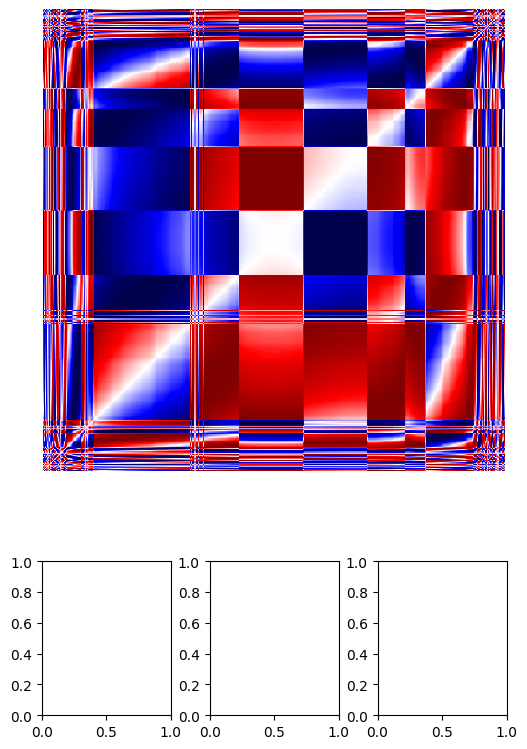

In [25]:
fig = plt.figure(figsize=(6,8))
fig_ij,fig_c = fig.subfigures(2,1,height_ratios=[3,1])
axs =fig_c.subplots(1,3)
ax_ij = fig_ij.subplots(1,1)
fig_c.subplots_adjust(wspace=0.3)
ax_ij.axis('off')

plt.sca(ax_ij)
plt.xticks([])
plt.yticks([])
K_want = 4.0
theta = theta_dict[K_want]
rs = np.abs(1/N * np.sum(np.exp(1j*theta),axis=1))
A = np.mean(rs)
A_min = np.searchsorted(rs[:100],A)
seg_theta = theta[A_min]
i,j = np.meshgrid(seg_theta,seg_theta)
im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,origin='lower',cmap = 'seismic',aspect=1,extent=[1,500,1,500])

NameError: name 'c0' is not defined

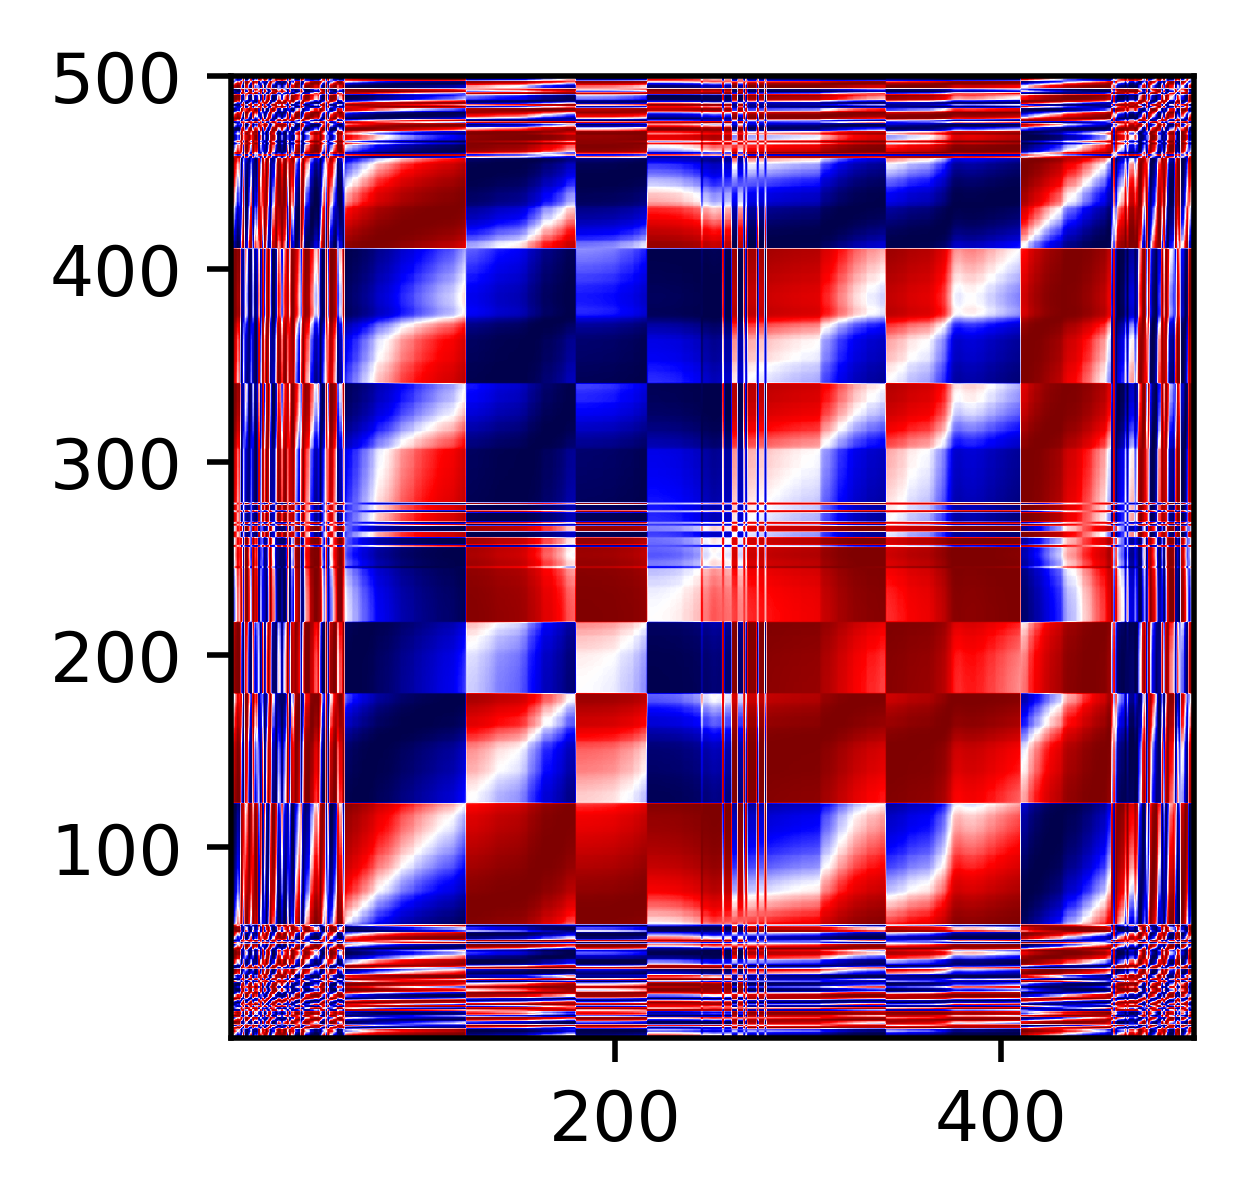

In [26]:
plt.figure(figsize=(2.5,2.5),dpi=500)
K_want = Ks[29]
theta = theta_dict[K_want]
rpsi = 1/N * np.sum(np.exp(1j*theta),axis=1)
rs = np.abs(rpsi)
psi = np.angle(rpsi)
A = np.mean(rs)
A_min = np.searchsorted(rs[:100],A)
seg_theta = theta[A_min]
i,j = np.meshgrid(seg_theta,seg_theta)
im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,origin='lower',cmap = 'seismic',aspect=1,extent=[1,500,1,500])
for clu,color in zip([c0,c1,c2],colors):
    min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
    cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
    cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
    cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
    cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])

plt.xticks([])
plt.yticks([])
ax = plt.gca()
ax.set_title(r'$K$= 4.4',loc='right')
# ax.set_title('(4c)',loc='left')
plt.tight_layout()


In [78]:
dtheta = dtheta_dict[K_want][-500:]
theta  = theta_dict[K_want][-500:]
rpsi = 1/N * np.sum(np.exp(1j*theta),axis=1)
rs = np.abs(rpsi)
psi = np.angle(rpsi)
n_dtheta = dtheta / np.max(abs(dtheta))
def time_oscillator(i):
    norm = n_dtheta[i]
    A = (1 + (norm)/2)
    theta_ = theta[i]
    sin,cos = A*np.sin(theta_+np.pi/2), A*np.cos(theta_+np.pi/2)
    
    return cos,sin,norm,np.cos(theta_+np.pi/2),np.sin(theta_+np.pi/2)

In [28]:
df_Km.columns[:50]

Index(['r', 'rmin', 'rmax', 'rstd', 'rMM', 'error', 'c0', 'c1', 'c2', 'c3',
       'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c0 phase vel', 'c1 phase vel',
       'c2 phase vel', 'c3 phase vel', 'c4 phase vel', 'c5 phase vel',
       'c6 phase vel', 'c7 phase vel', 'c8 phase vel', 'c9 phase vel',
       'c0 omega', 'c1 omega', 'c2 omega', 'c3 omega', 'c4 omega', 'c5 omega',
       'c6 omega', 'c7 omega', 'c8 omega', 'c9 omega', 'c0 list', 'c1 list',
       'c2 list', 'c3 list', 'c4 list', 'c5 list', 'c6 list', 'c7 list',
       'c8 list', 'c9 list', 'theta000', 'theta001', 'theta002', 'theta003'],
      dtype='object')

In [29]:
df_Km['c0 list']

K     m 
0.0   10                                                  NaN
0.1   10                                                  NaN
0.2   10                                                  NaN
0.3   10                                                  NaN
0.4   10                                                  NaN
                                  ...                        
14.6  10    482 481 480 479 478 477 476 475 474 473 472 47...
14.7  10    482 481 480 479 478 477 476 475 474 473 472 47...
14.8  10    482 481 480 479 478 477 476 475 474 473 472 47...
14.9  10    29 30 41 42 43 44 45 46 47 48 49 50 51 52 53 5...
15.0  10    482 481 480 479 478 477 476 475 474 473 472 47...
Name: c0 list, Length: 151, dtype: object

In [23]:
m = 10
K_want= 6.3
try:
    c0 = np.array(df_Km.query(f'(m=={m})&(K=={K_want})')['c0 list'].split(' '),dtype=int)
    c1 = np.array(df_Km.query(f'(m=={m})&(K=={K_want})')['c1 list'].split(' '),dtype=int)
    c2 = np.array(df_Km.query(f'(m=={m})&(K=={K_want})')['c2 list'].split(' '),dtype=int)
    c3 = np.array(df_Km.query(f'(m=={m})&(K=={K_want})')['c3 list'].split(' '),dtype=int)
    # c4 = np.array(df_f_cluster.query(f'(m=={m})&(K=={K_want})')['c4 list'].split(' '),dtype=int)
except AttributeError:
    c0 = []
    c1 = []
    c2 = []

# c0_p = np.array(df_Km.loc[(K_want,m)]['c0 phase vel'])
# c1_p = np.array(df_Km.loc[(K_want,m)]['c1 phase vel'])
# c2_p = np.array(df_Km.loc[(K_want,m)]['c2 phase vel'])

In [30]:
df_Km.query(f'(m=={m})&(K=={6})')['c3 list']

K    m 
6.0  10    9 10 11 12 13 14 15 16 31 17 30 18 19 29 28 27...
Name: c3 list, dtype: object

In [32]:
m =10

In [76]:
K_want = Ks[29]
def split_(x):
    if type(x)!=float:
        return np.array(x.split(' '),dtype=int)
    else:
        return []
clusters = ['c0 list','c1 list','c2 list','c3 list','c4 list','c5 list']
clu_s = df_Km.loc[(K_want,m)][clusters].apply(split_)
c0 = clu_s[clusters[0]]
c1 = clu_s[clusters[1]]
c2 = clu_s[clusters[2]]
c3 = clu_s[clusters[3]]
c4 = clu_s[clusters[4]]
c5 = clu_s[clusters[5]]
print(clu_s)

c0 list    [255, 260, 261, 262, 266, 268, 269, 270, 271, ...
c1 list    [215, 214, 213, 212, 211, 210, 209, 208, 207, ...
c2 list    [121, 120, 119, 118, 117, 116, 115, 114, 113, ...
c3 list    [410, 411, 412, 413, 414, 415, 416, 417, 418, ...
c4 list                                                   []
c5 list                                                   []
Name: (2.9000000000000004, 10), dtype: object


In [62]:
np.array(df_Km.loc[(K_want,m)]['c1 list']).shape


()

In [63]:
c1_p

NameError: name 'c1_p' is not defined

In [35]:
c_ = np.linspace(-np.pi,np.pi,1000)
circle = {
    'x': np.cos(c_),'y':np.sin(c_)
}

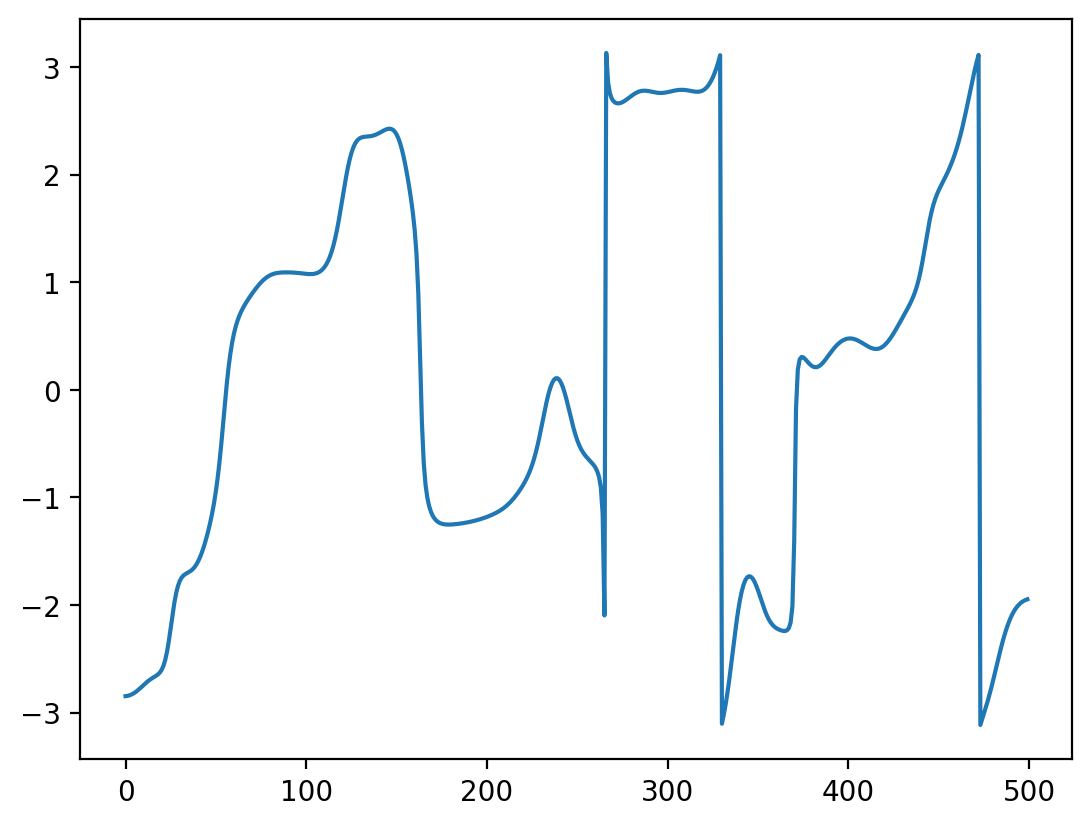

In [77]:
plt.plot(psi)

In [36]:
CLU = np.concatenate([c0,c1,c2,c3,c4])
not_CLU = np.setdiff1d(np.arange(N),CLU)


In [37]:
import matplotlib.colors as mcl

In [38]:
tod = rs[:100]
A = np.array([np.argmin(tod),np.searchsorted(tod,np.mean(tod)),np.argmax(tod)])

In [39]:
c

NameError: name 'c' is not defined

In [40]:
plt.cm.coolwarm(0)

(0.2298057, 0.298717966, 0.753683153, 1.0)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_33338/2938429993.py:52: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_33338/2938429993.py:53: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=col

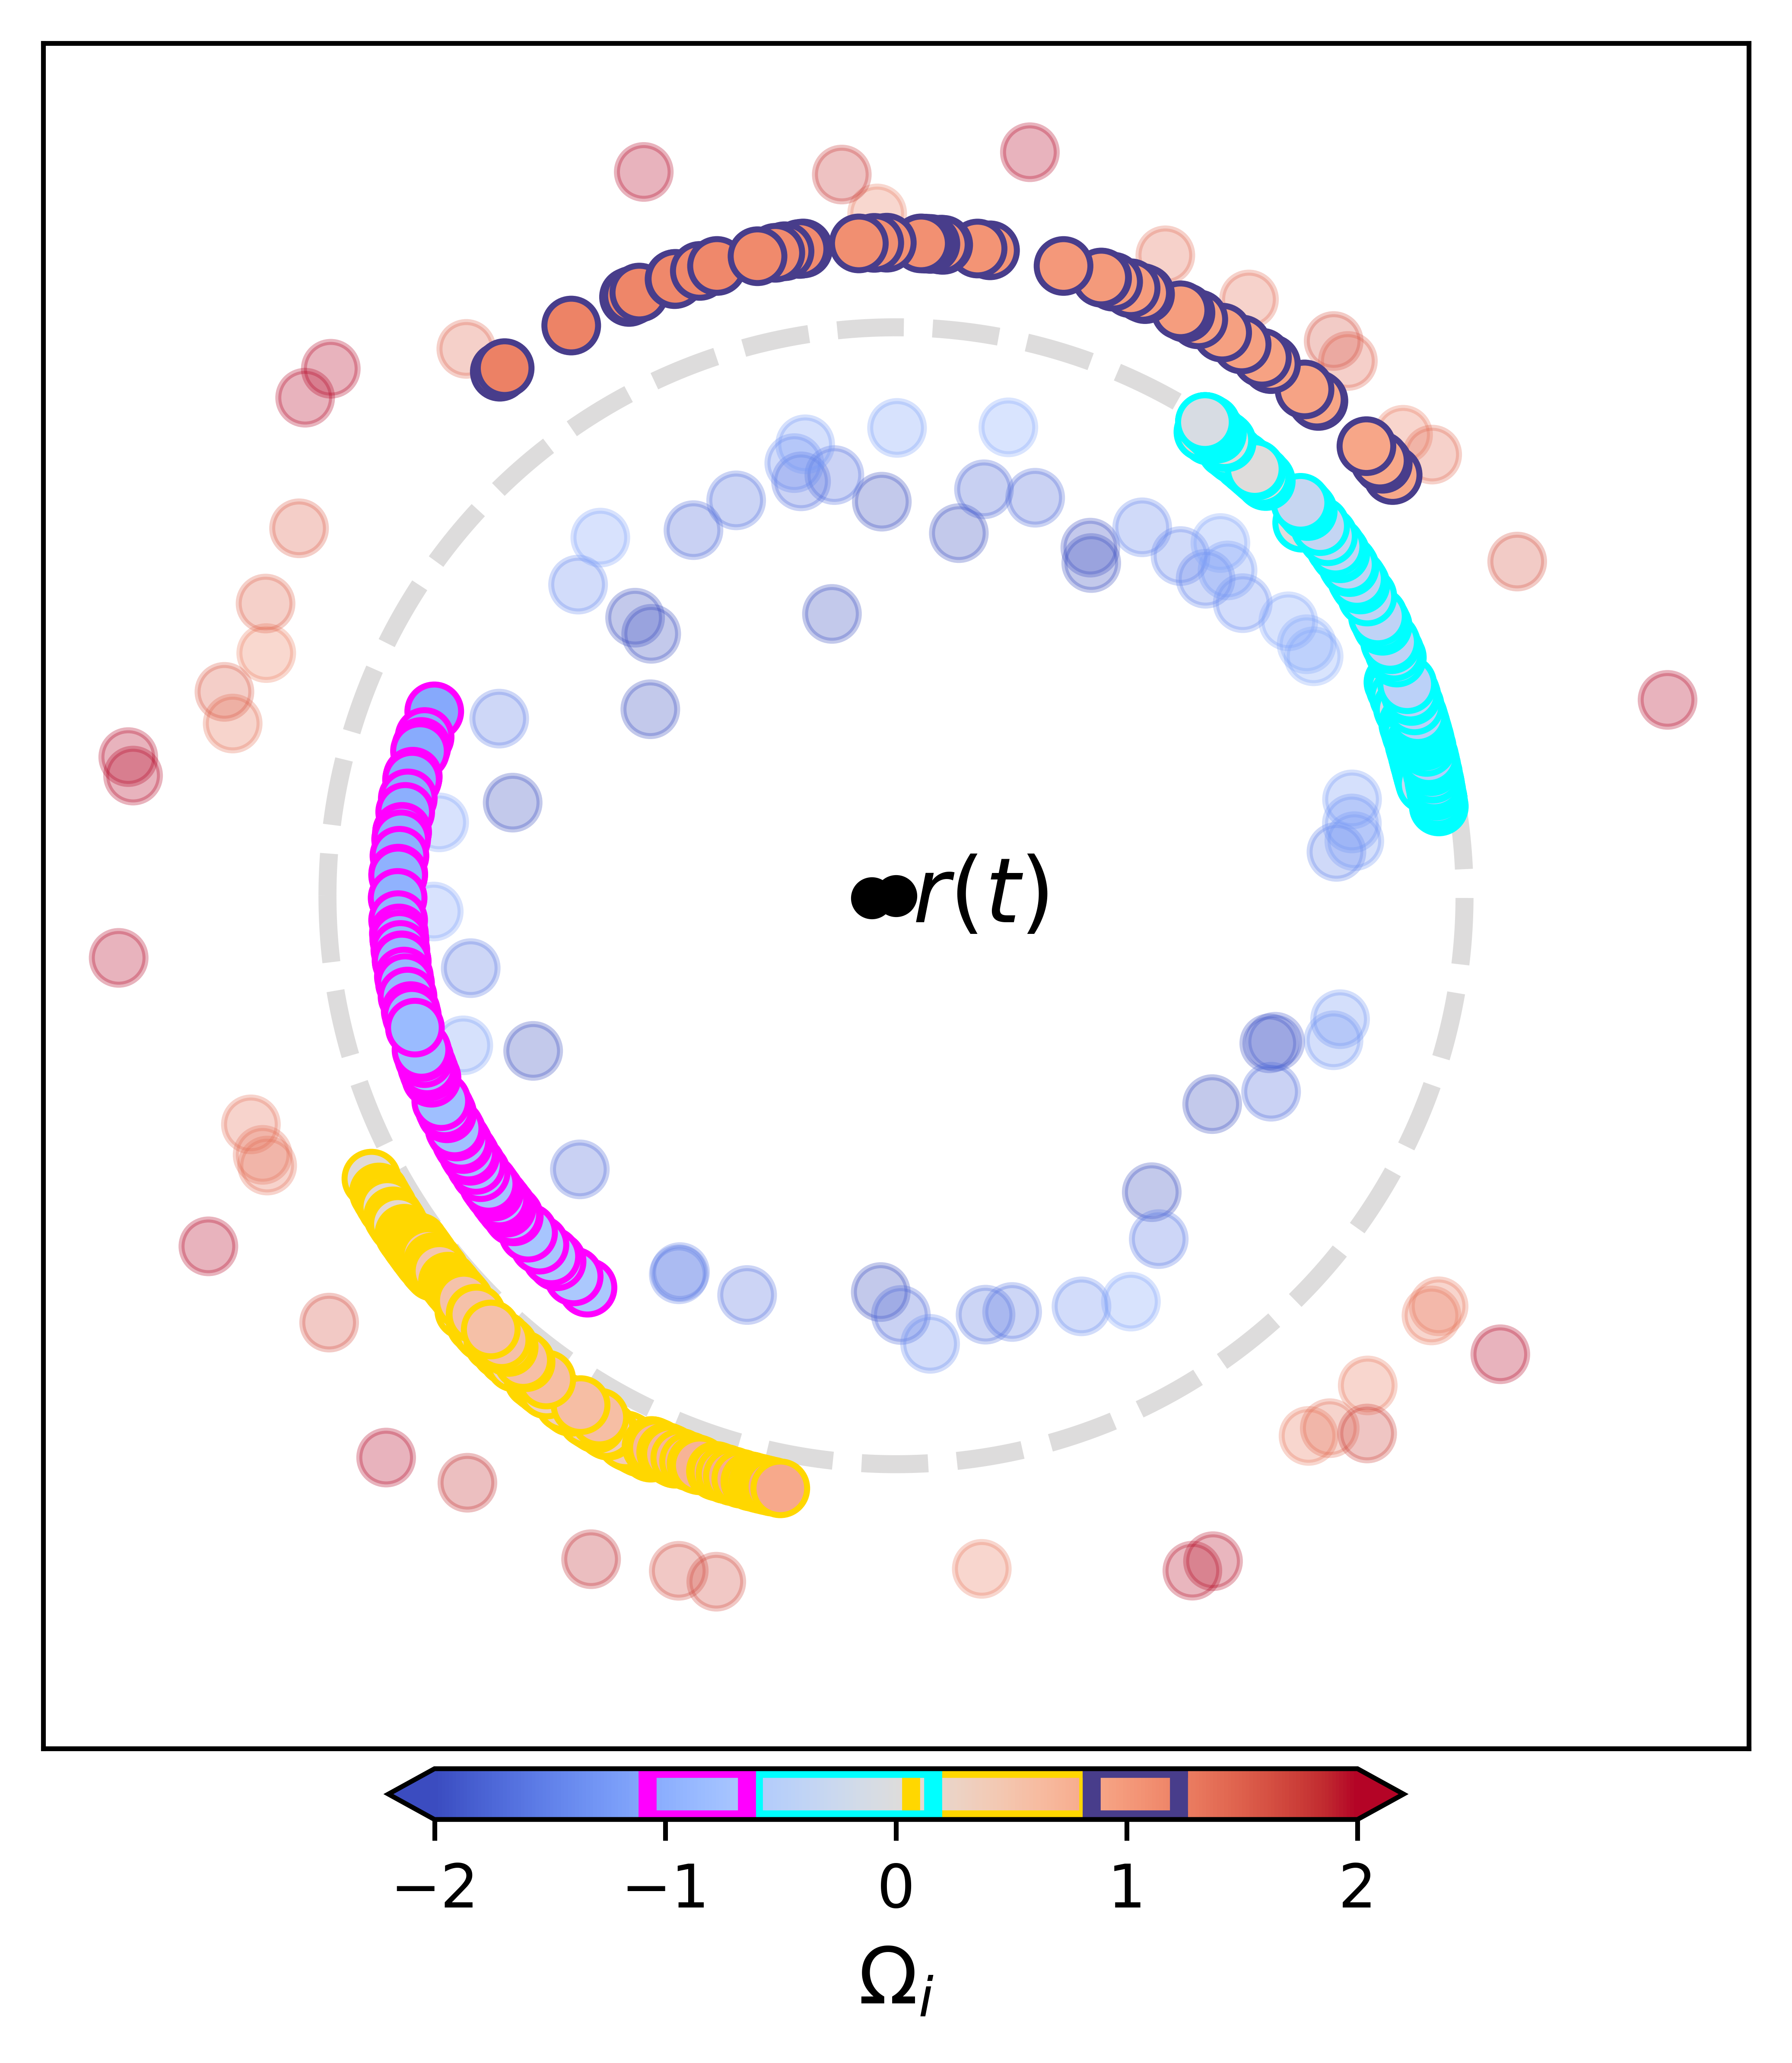

In [79]:
i = 23
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=500,facecolor=(1,1,1,0))

# colors = ['gold','darkslateblue','darkred']
colors = ['gold','aqua','fuchsia']
colors = ['gold','aqua','fuchsia','darkslateblue','darkred']
X,Y,C_,x,y = time_oscillator(i)
ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r(t)$',horizontalalignment='left', verticalalignment='center',fontsize=15)
cmap = 'coolwarm'#'Spectral'#'viridis'#
s = 100
data = {
    'x': X[not_CLU],'y':Y[not_CLU],
    'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
    'cmap':cmap,
    # 'c': colors,#ome"ga,'cmap':'YlOrRd',
}
cax_ = ax.scatter(**data,zorder=1)
alpha = 1
alpha_text = f'{round(alpha*255):02x}'
for clu,color in zip([c0,c1,c2,c3,c4],colors):
    if len(clu)!=0:
        data = {
            'x': X[clu],'y':Y[clu],
            'c': omega[clu],'cmap':cmap,
            'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
        cax = ax.scatter(**data,zorder=1)


ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
# ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])
# ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
plt.tight_layout()
# ax = plt.gca()
plt.gca().set_aspect('equal')
cbar = plt.colorbar(cax,extend='both',shrink = 0.5,orientation='horizontal',location='bottom',pad=0.01)
# cbar.ax.plot([0,1],[1]*2,'w')
# for clu,color in zip([c0,c1,c2],colors):
for clu,color in zip([c0,c1,c2,c3,c4],colors):

    if len(clu)!=0:
        min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
        cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
# p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
# ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.353))
# ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)

cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)

In [134]:
len(clu)

0

In [ ]:
plt.cm.coolwarm(0.5)
plt.cm.coolwarm(0.3)
plt.cm.coolwarm(0.7)[:3]

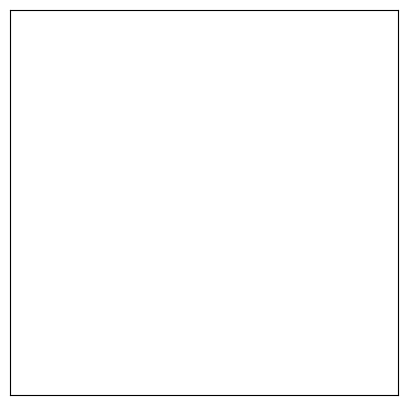

In [45]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 5),dpi=100,facecolor=(1,1,1,0))
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor((1,1,1,0))

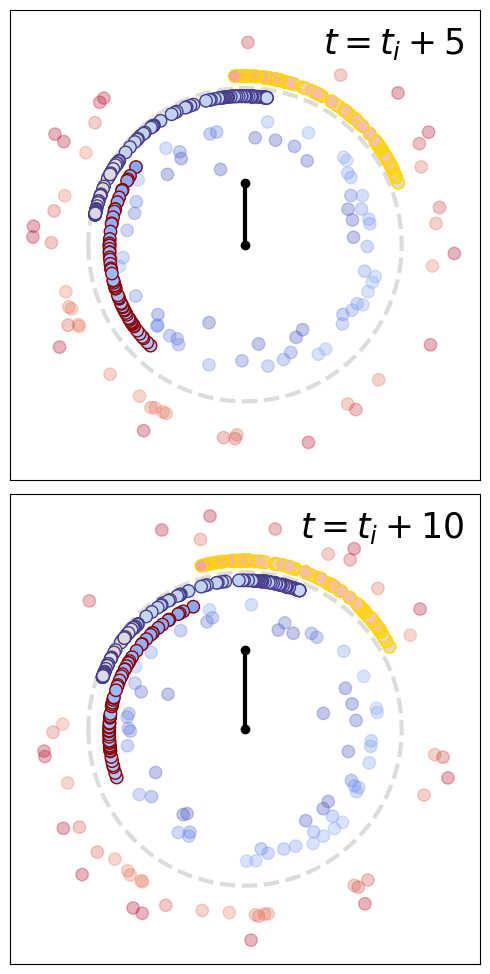

In [42]:
i = A[1]
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5, 10),dpi=100,facecolor=(1,1,1,0))
for ax,p_ in zip(axs,[+5,10]):
    i = A[1]+p_
    colors = ['gold','darkslateblue','darkred']
    X,Y,C_,x,y = time_oscillator(i)
    ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
    # ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r$',horizontalalignment='left', verticalalignment='center',fontsize=15)
    cmap = 'coolwarm'#'Spectral'#'viridis'#
    s = 100
    data = {
        'x': X[not_CLU],'y':Y[not_CLU],
        'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
        'cmap':cmap,
        # 'c': colors,#omega,'cmap':'YlOrRd',
    }
    cax_ = ax.scatter(**data,zorder=1)
    alpha = 1
    alpha_text = f'{round(alpha*255):02x}'
    for clu,color in zip([c0,c1,c2],colors):
        data = {
            'x': X[clu],'y':Y[clu],
            'c': omega[clu],'cmap':cmap,
            'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
        cax = ax.scatter(**data,zorder=1)
    if p_<0:
        text_ = r'$t=t_i-$'+f'{abs(p_)}'
    else:
        text_ = r'$t=t_i+$'+f'{abs(p_)}'

    ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    # ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_facecolor((1,1,1,0))
    ax.text(1.4,1.4,text_,horizontalalignment='right', verticalalignment='top',fontsize=25)
    # ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
    plt.tight_layout()
    

    # ax = plt.gca()
    ax.set_aspect('equal')
plt.tight_layout()

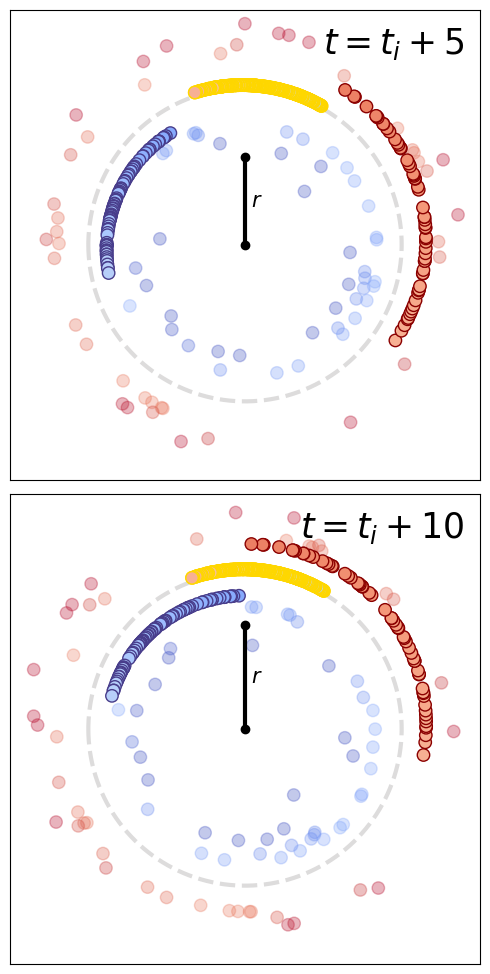

In [47]:
i = A[1]
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5, 10),dpi=100,facecolor=(1,1,1,1))
for ax,p_ in zip(axs,[+5,10]):
    i = A[1]+p_
    colors = ['gold','darkslateblue','darkred']
    X,Y,C_,x,y = time_oscillator(i)
    ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
    ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r$',horizontalalignment='left', verticalalignment='center',fontsize=15)
    cmap = 'coolwarm'#'Spectral'#'viridis'#
    s = 100
    data = {
        'x': X[not_CLU],'y':Y[not_CLU],
        'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
        'cmap':cmap,
        # 'c': colors,#omega,'cmap':'YlOrRd',
    }
    cax_ = ax.scatter(**data,zorder=1)
    alpha = 1
    alpha_text = f'{round(alpha*255):02x}'
    for clu,color in zip([c0,c1,c2],colors):
        data = {
            'x': X[clu],'y':Y[clu],
            'c': omega[clu],'cmap':cmap,
            'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
        cax = ax.scatter(**data,zorder=1)
    if p_<0:
        text_ = r'$t=t_i-$'+f'{abs(p_)}'
    else:
        text_ = r'$t=t_i+$'+f'{abs(p_)}'

    ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    # ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(1.4,1.4,text_,horizontalalignment='right', verticalalignment='top',fontsize=25)
    # ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
    plt.tight_layout()
    

    # ax = plt.gca()
    ax.set_aspect('equal')
plt.tight_layout()

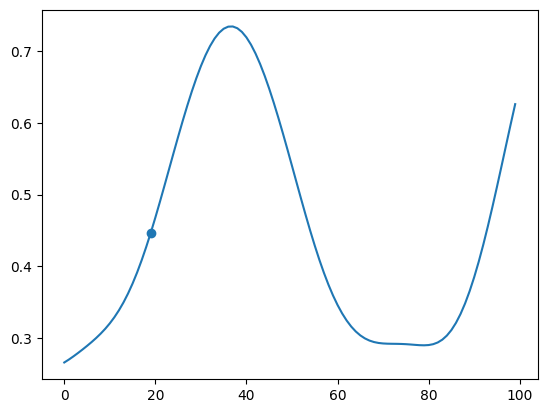

In [48]:
plt.plot(rs[:100])
plt.scatter(np.arange(100)[A[1]],rs[:100][A[1]])

In [ ]:
theta_dict

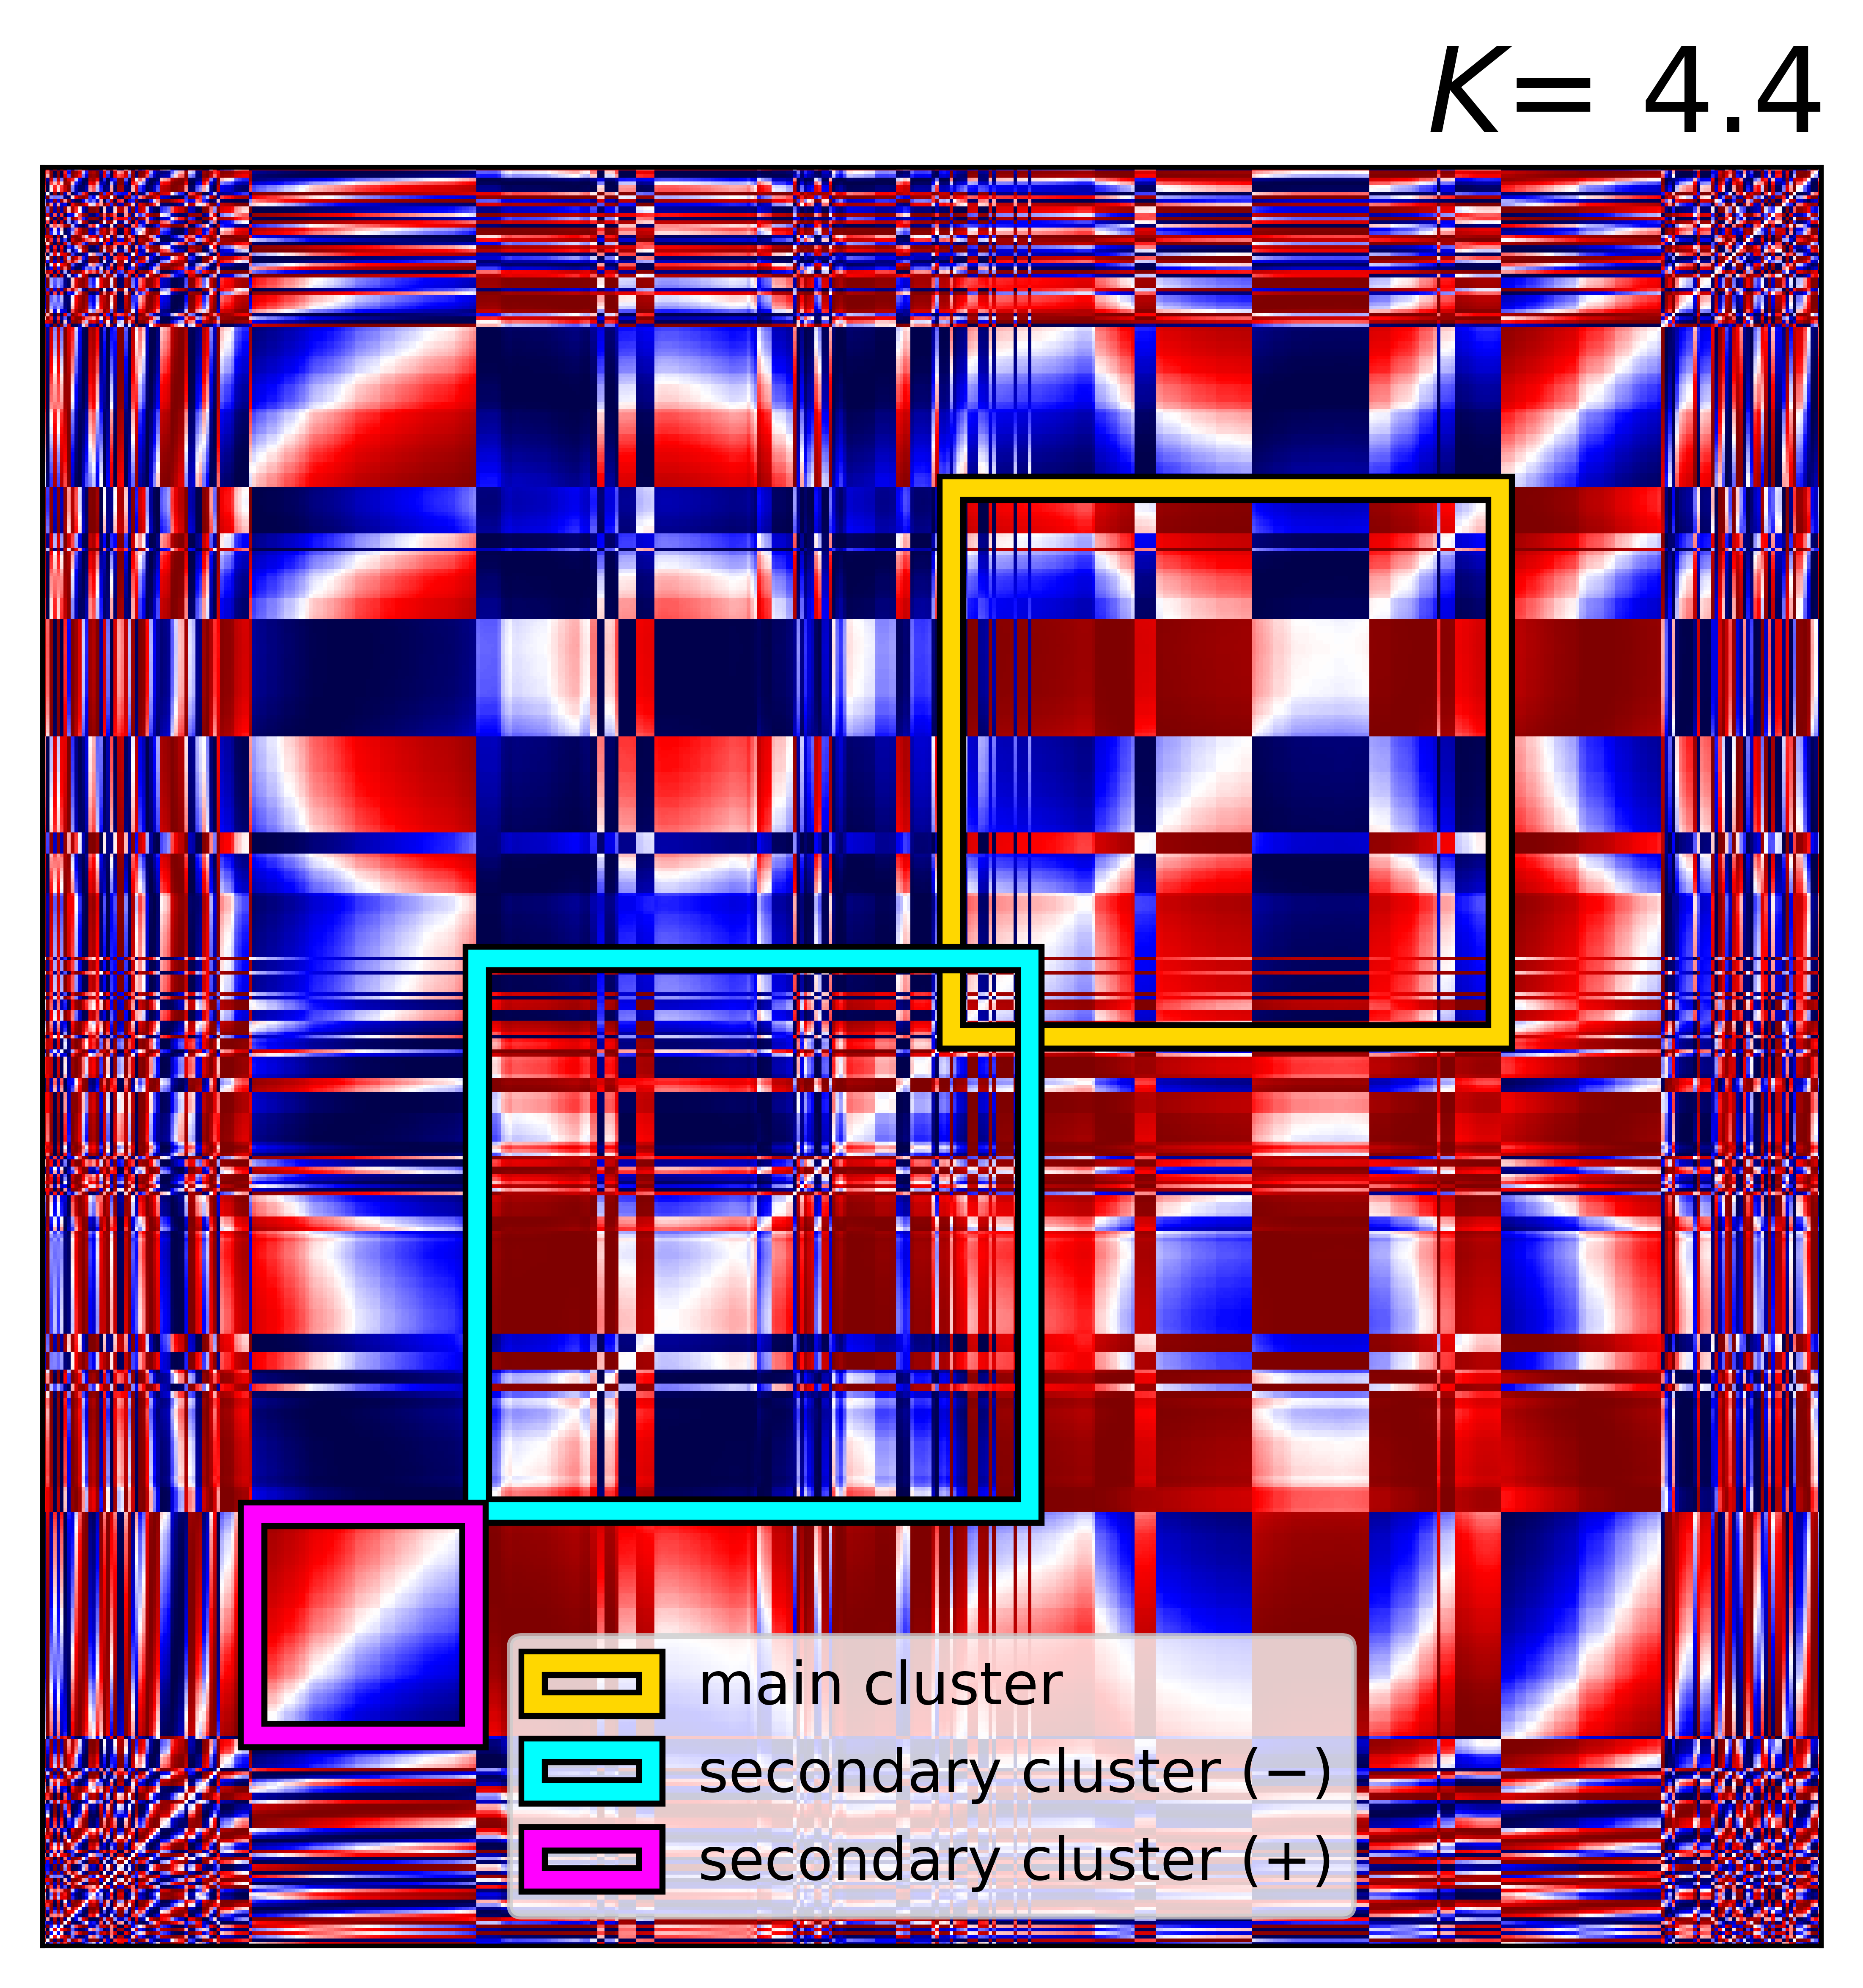

In [68]:
# plt.figure(figsize=(2.5,2.5),dpi=500)
plt.figure(dpi=500)
K_want = 3.5
theta = theta_dict[K_want]
rpsi = 1/N * np.sum(np.exp(1j*theta),axis=1)
rs = np.abs(rpsi)
psi = np.angle(rpsi)
# fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5, 10),dpi=100,facecolor=(1,1,1,0))
ax = plt.gca()
seg_theta = theta[A[1]]
i,j = np.meshgrid(seg_theta,seg_theta)
im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,origin='lower',cmap = 'seismic',aspect=1,extent=[1,500,1,500])
RECs = []
for clu,color in zip([c0,c1,c2],colors):
    min_c,max_c = np.max(clu),np.min(clu)
    Rec_ = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor='k', linewidth=5)
    Rec = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor=color, linewidth=3)
    RECs.append((Rec_,Rec))
    plt.gca().add_patch(Rec_)
    plt.gca().add_patch(Rec)


    # ax.text(20,480,text_,horizontalalignment='left', verticalalignment='top',fontsize=25,bbox=mybox)
    plt.xticks([])
    plt.yticks([])
    ax = plt.gca()
ax.set_title(r'$K$= 4.4',fontsize=20,loc='right')
plt.legend(RECs,['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center')
# ax.set_title('(4c)',loc='left')
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

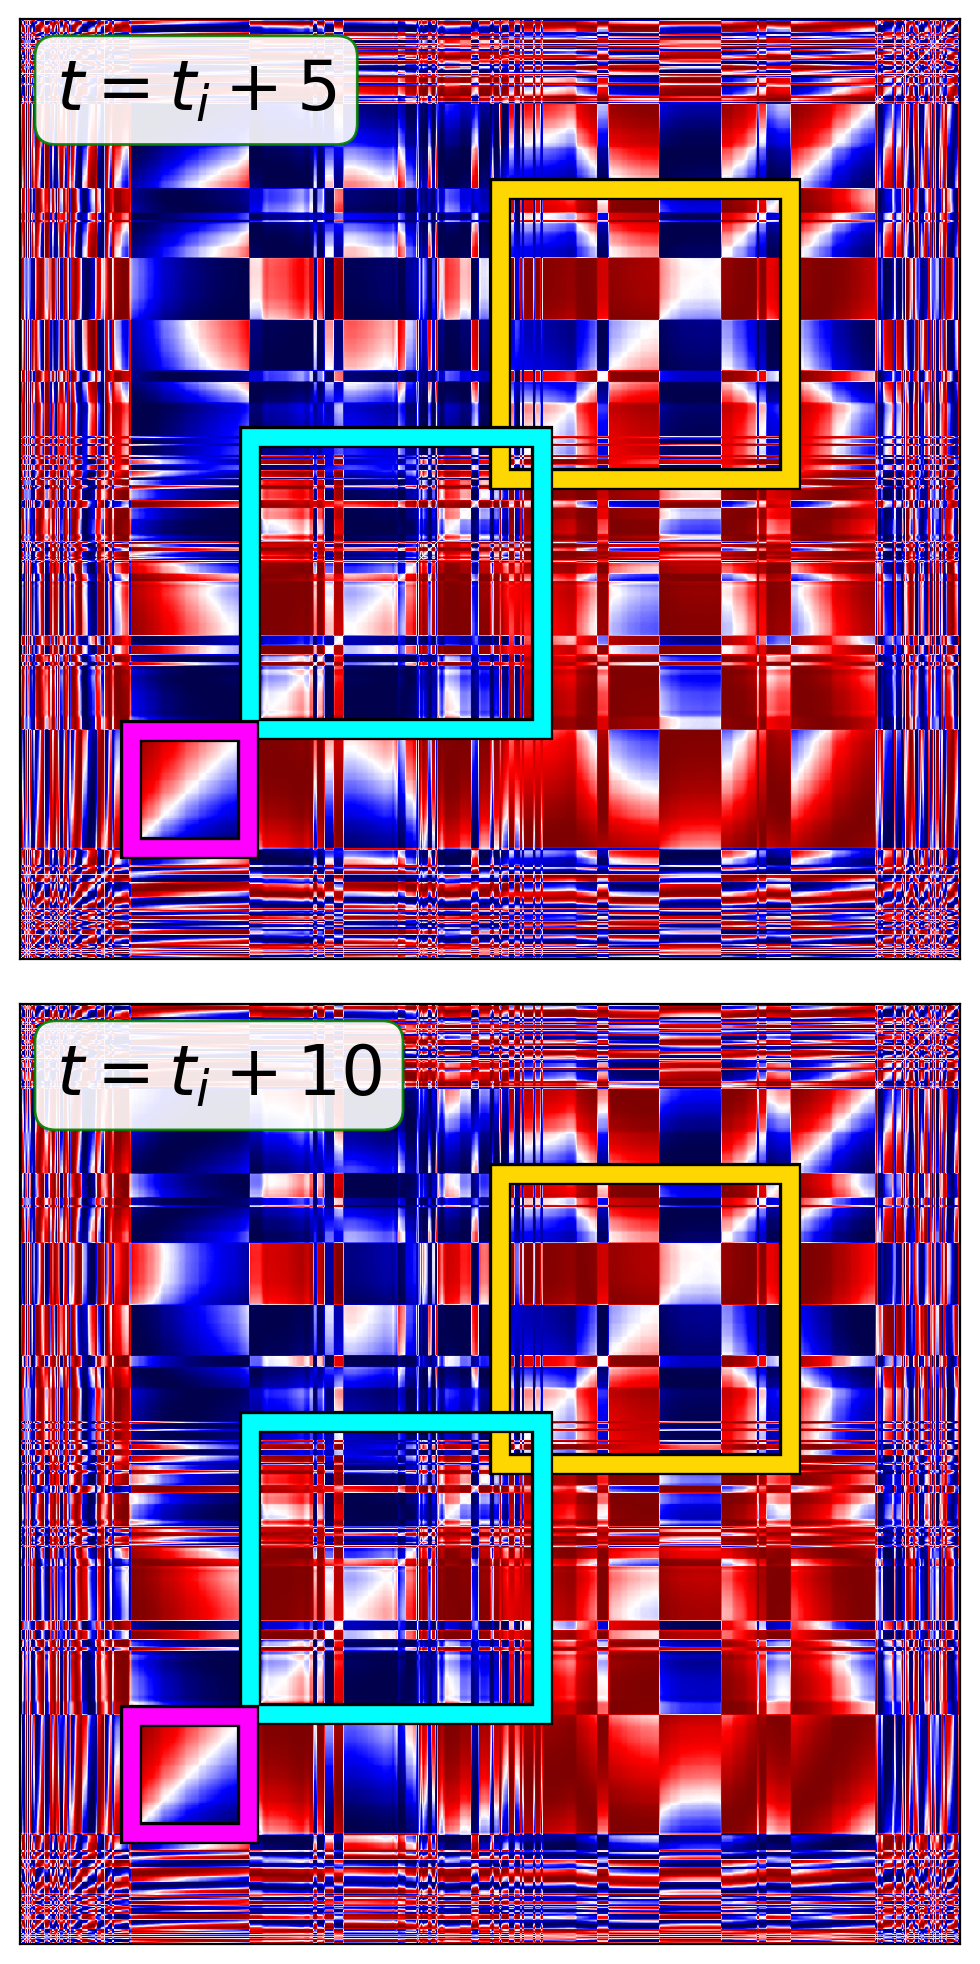

In [69]:
# plt.figure(figsize=(2.5,2.5),dpi=500)
plt.figure()
# K_want = Ks[]
theta = theta_dict[K_want]
rpsi = 1/N * np.sum(np.exp(1j*theta),axis=1)
rs = np.abs(rpsi)
psi = np.angle(rpsi)
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(5, 10),dpi=100,facecolor=(1,1,1,0))
mybox={'facecolor':'white','edgecolor':'g','boxstyle':'round','alpha':0.9}
for ax,p_ in zip(axs,[+5,10]):
    plt.sca(ax)
    seg_theta = theta[A[1]+p_]
    i,j = np.meshgrid(seg_theta,seg_theta)
    im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,origin='lower',cmap = 'seismic',aspect=1,extent=[1,500,1,500])
    RECs = []
    for clu,color in zip([c0,c1,c2],colors):
        if len(clu)!=0:
            min_c,max_c = np.max(clu),np.min(clu)
            Rec_ = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor='k', linewidth=8)
            Rec = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor=color, linewidth=6)
            RECs.append((Rec_,Rec))
            plt.gca().add_patch(Rec_)
            plt.gca().add_patch(Rec)
            # plt.plot([min_c,max_c],[min_c]*2,color=color,lw=2)
            # plt.plot([min_c,max_c],[max_c]*2,color=color,lw=2)
            # plt.plot([min_c]*2,[min_c,max_c],color=color,lw=2)
            # plt.plot([max_c]*2,[min_c,max_c],color=color,lw=2)
            # plt.fill_between([min_c,max_c],[min_c]*2,[max_c]*2,alpha=0.2,color=color)

    if p_<0:
        text_ = r'$t=t_i-$'+f'{abs(p_)}'
    else:
        text_ = r'$t=t_i+$'+f'{abs(p_)}'

    ax.text(20,480,text_,horizontalalignment='left', verticalalignment='top',fontsize=25,bbox=mybox)
    plt.xticks([])
    plt.yticks([])
    ax = plt.gca()
# ax.set_title(r'$K$= 4.4',fontsize=20,loc='right')
# plt.legend(RECs,['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center')
# ax.set_title('(4c)',loc='left')
plt.tight_layout()
plt.show()

In [45]:
str(hex(10))

'0xa'

In [46]:
alpha = 0.1
f'{round(alpha*255):02x}'

'1a'

In [47]:
(*mcl.to_rgb(color),alpha)

(0.5450980392156862, 0.0, 0.0, 0.1)

In [48]:
R = [np.min(rs[:100]),np.mean(rs[:100]),np.max(rs[:100])]
R_to_idx = lambda x: np.searchsorted(rs[:100],x,'right')
tod = rs[:100]
A = np.array([np.argmin(tod),np.searchsorted(tod,np.mean(tod)),np.argmax(tod)])


In [ ]:
plt.plot(A,tod[A])

## Animation

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_33338/1357216995.py:90: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_33338/1357216995.py:91: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=col

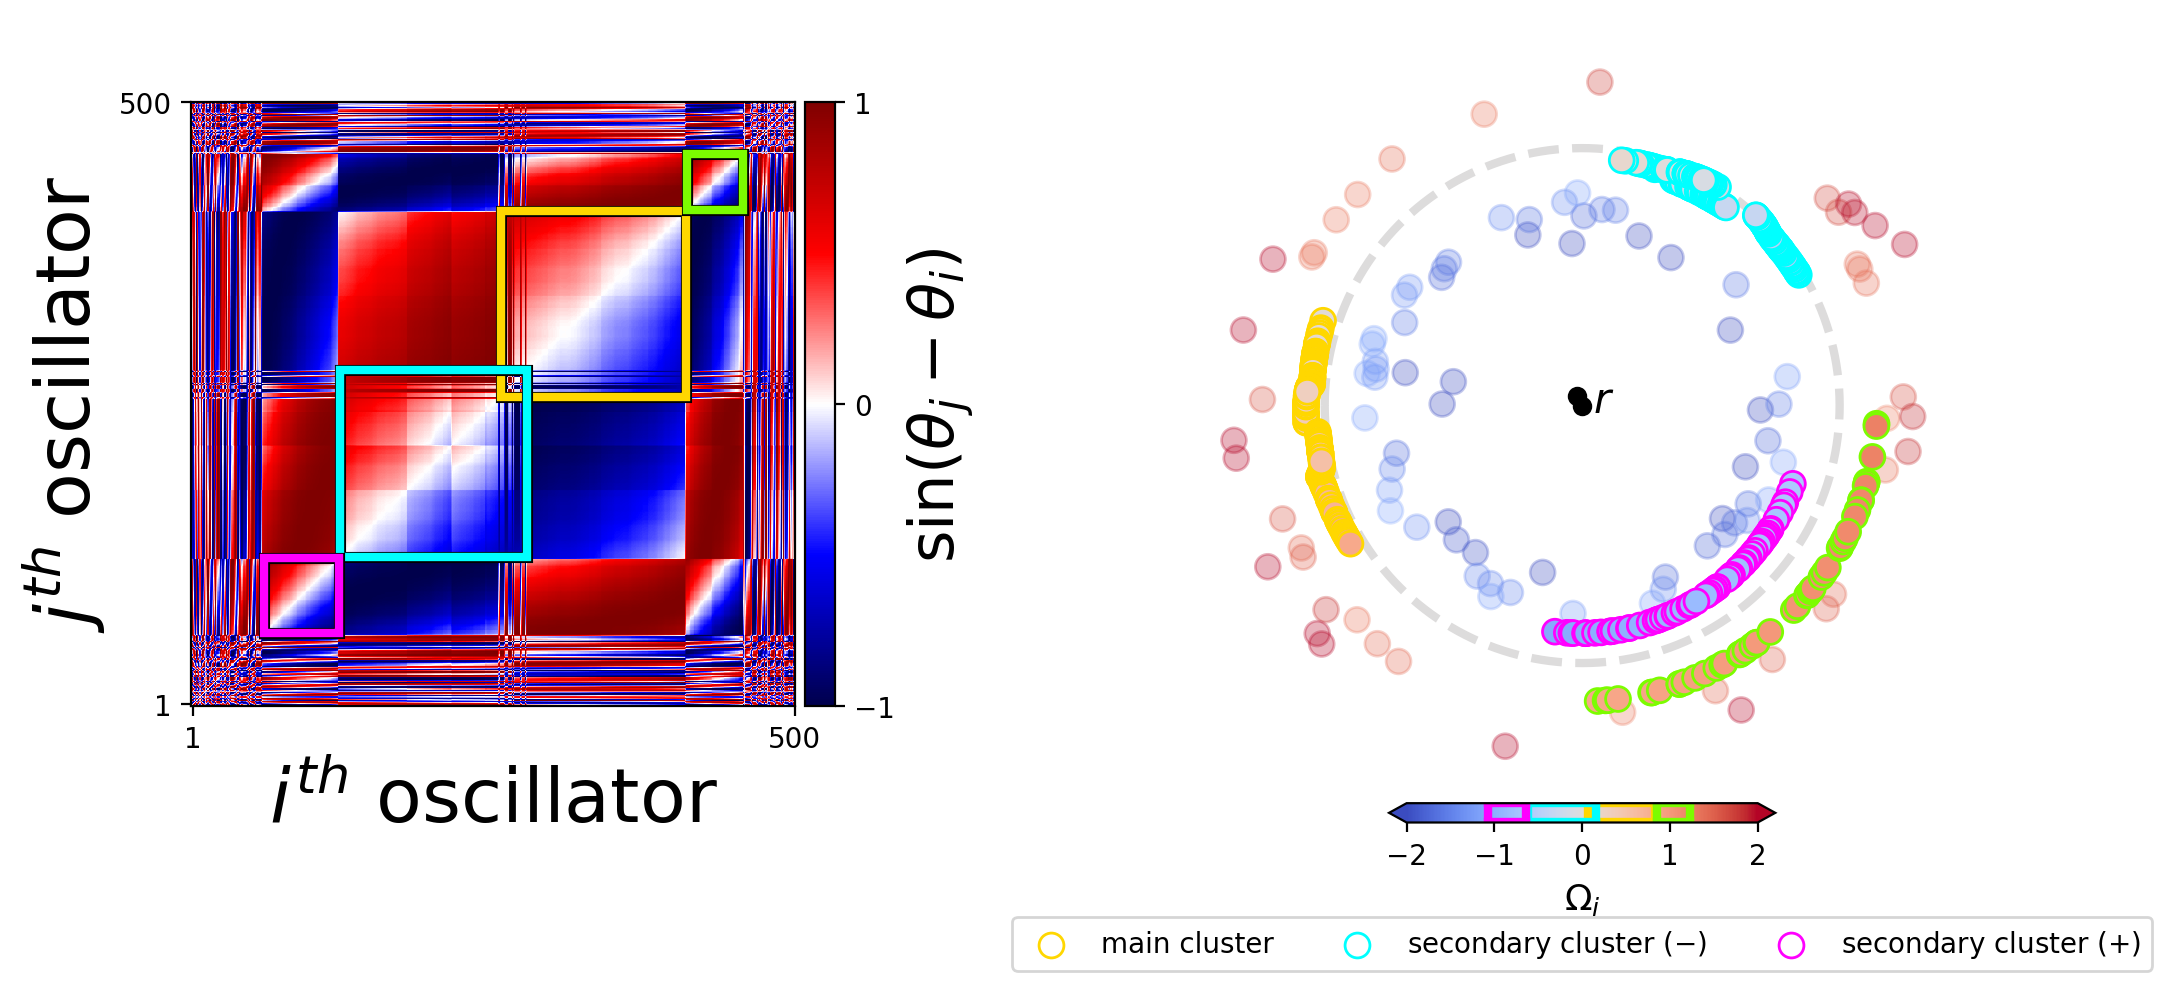

In [90]:
from itertools import combinations,permutations
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, (ax_sin, ax) = plt.subplots(ncols=2, nrows=1, figsize=(11, 6),dpi=100,facecolor=(1,1,1,0),width_ratios=[5,6])
multi_ = 1.5



i = 0
index = i
s = 800
cmap = 'bwr'
# colors = ['gold','darkslateblue','darkred']
# colors = ['gold','aqua','fuchsia']
colors = ['gold','aqua','fuchsia','lawngreen','orangered']

RECs = []
plt.sca(ax_sin)
I,J = np.meshgrid(theta[i],theta[i])
im = plt.imshow(np.sin(J-I),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',)
plt.xticks([1,500])
plt.yticks([1,500])
plt.xlabel(r'$i^{th}$ oscillator',fontsize=18*multi_)
plt.ylabel(r'$j^{th}$ oscillator',fontsize=18*multi_)

for clu,color in zip([c0,c1,c2,c3,c4],colors):
    if len(clu)!=0:

        min_c,max_c = np.max(clu),np.min(clu)
        Rec_ = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor='k', linewidth=4)
        Rec = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor=color, linewidth=3)
        RECs.append((Rec_,Rec))
        plt.gca().add_patch(Rec_)
        plt.gca().add_patch(Rec)
# plt.title(f'K = {Ks[K_idx]}',fontsize=18*multi_)
div = make_axes_locatable(ax_sin)
cax = div.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.set_ticks([-1,0,1])
cbar.set_label(r'$\sin(\theta_j-\theta_i)$',fontsize=15*multi_)
############################ rotator graph ####################

plt.sca(ax)
# colors = ['gold','darkslateblue','darkred']
X,Y,C_,x,y = time_oscillator(i)
ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r$',horizontalalignment='left', verticalalignment='center',fontsize=15)
cmap = 'coolwarm'#'Spectral'#'viridis'#
s = 100
data = {
    'x': X[not_CLU],'y':Y[not_CLU],
    'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
    'cmap':cmap,
    # 'c': colors,#omega,'cmap':'YlOrRd',
}
cax_ = ax.scatter(**data,zorder=1)
alpha = 1
alpha_text = f'{round(alpha*255):02x}'
for clu,color in zip([c0,c1,c2,c3,c4],colors):
    if len(clu)!=0:

        data = {
            'x': X[clu],'y':Y[clu],
            'c': omega[clu],'cmap':cmap,
            'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
        cax = ax.scatter(**data,zorder=1)


ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
# ax.axis('off')

ax.set_xticks([])
ax.set_yticks([])
# ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
plt.tight_layout()
# ax = plt.gca()
ax.set_aspect('equal')
cbar = plt.colorbar(cax,extend='both',shrink = 0.5,orientation='horizontal',location='bottom',pad=0.01)
# cbar.ax.plot([0,1],[1]*2,'w')
for clu,color in zip([c0,c1,c2,c3,c4],colors):
    if len(clu)!=0:

        min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
        cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
        cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.25),ncols=3)
# ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)

cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.axis('off')
ax.set_facecolor((1,1,1,0))
ax.set_aspect('equal')
for _ in range(100):fig.tight_layout()


# ax = plt.gca()

In [94]:
colors

['gold', 'aqua', 'fuchsia', 'lawngreen', 'orangered']

In [71]:
theta = theta[-500:]

In [95]:
fig.set_facecolor('white')
def ANI2(A_idx):
    i = A_idx
    index = i
    s = 800
    cmap = 'bwr'
    # colors = ['gold','darkslateblue','darkred']
    colors = ['gold','aqua','fuchsia','lawngreen','orangered']

    RECs = []
    ax_sin.clear()
    # plt.sca(ax_sin)
    I,J = np.meshgrid(theta[i],theta[i])
    im = ax_sin.imshow(np.sin(J-I),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',)
    ax_sin.set_xticks([1,500])
    ax_sin.set_yticks([1,500])
    ax_sin.set_xlabel(r'$i^{th}$ oscillator',fontsize=18*multi_)
    ax_sin.set_ylabel(r'$j^{th}$ oscillator',fontsize=18*multi_)

    # for clu,color in zip([c0,c1,c2],colors):
    for clu,color in zip([c0,c1,c2,c3,c4],colors):

        if len(clu)!=0:
            min_c,max_c = np.max(clu),np.min(clu)
            Rec_ = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor='k', linewidth=3)
            Rec = plt.Rectangle((min_c+1,min_c+1),max_c-min_c,max_c-min_c,fill=False, edgecolor=color, linewidth=2)
            RECs.append((Rec_,Rec))
            ax_sin.add_patch(Rec_)
            ax_sin.add_patch(Rec)
    ############################ rotator graph ####################
    ax.clear()

    # colors = ['gold','darkslateblue','darkred']
    X,Y,C_,x,y = time_oscillator(i)
    ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
    ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r$',horizontalalignment='left', verticalalignment='center',fontsize=15)
    cmap = 'coolwarm'#'Spectral'#'viridis'#
    s = 100
    data = {
        'x': X[not_CLU],'y':Y[not_CLU],
        'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
        'cmap':cmap,
        # 'c': colors,#omega,'cmap':'YlOrRd',
    }
    cax_ = ax.scatter(**data,zorder=1)
    alpha = 1
    alpha_text = f'{round(alpha*255):02x}'
    # for clu,color in zip([c0,c1,c2],colors):
    for clu,color in zip([c0,c1,c2,c3,c4],colors):

        if len(clu)!=0:

            data = {
                'x': X[clu],'y':Y[clu],
                'c': omega[clu],'cmap':cmap,
                'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
            cax = ax.scatter(**data,zorder=1)


    ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    # ax.axis('off')

    ax.set_xticks([])
    ax.set_yticks([])
    # ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)

    # ax = plt.gca()
    ax.set_aspect('equal')
    # cbar = plt.colorbar(cax,extend='both',shrink = 0.5,orientation='horizontal',location='bottom',pad=0.01)
    # cbar.ax.plot([0,1],[1]*2,'w')
    # for clu,color in zip([c0,c1,c2],colors):
    for clu,color in zip([c0,c1,c2,c3,c4],colors):

        if len(clu)!=0:

            min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
            cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
            cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
            cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
            cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
    p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
    p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
    p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
    # ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.25),ncols=3)
    # ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)

    # cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)

    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    ax.axis('off')
    ax.set_facecolor((1,1,1,0))
    ax.set_aspect('equal')
    fig.tight_layout()



In [96]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [99]:
K_want

2.9000000000000004

In [98]:
idxs = range(400)
%config InlineBackend.figure_format = 'retina'
ani = FuncAnimation(fig,ANI2,frames=idxs,interval=50)
# ani.save('Groups oscillation2.mp4',dpi=400)
ani.save(f'230721 statphys poster/clusters oscillation m = {m}, K = {K_want:.01f}.mp4',dpi=400)
# HTML(ani.to_html5_video())

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_33338/2683584225.py:83: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_33338/2683584225.py:84: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=col

## order parameter

In [215]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks

In [216]:
seed =10
N = 500
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 6
t = np.arange(0,1000,0.1)
K = 3.9
sum_time = 500
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)
multi = 1.5

NameError: name 'mean_r2' is not defined

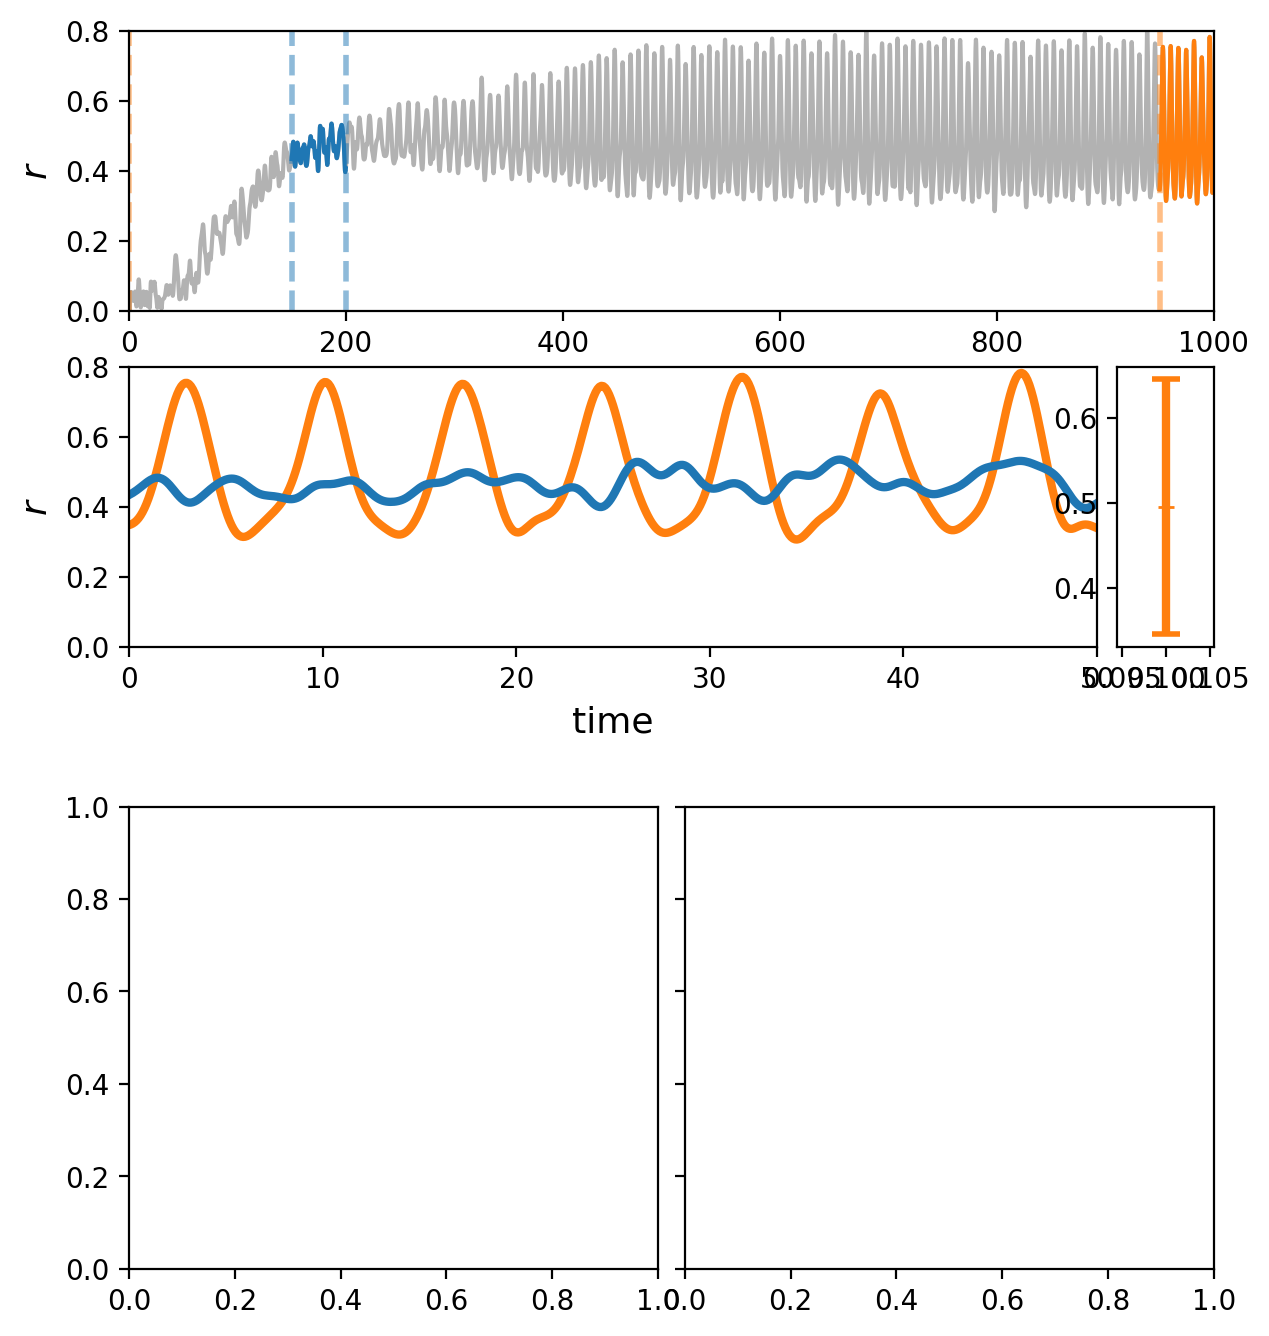

In [217]:
fig = plt.figure(figsize=(7,7))
subfigs = fig.subfigures(2,1,height_ratios=[2,1.5],hspace=15)
ax1,ax2 = subfigs[0].subplots(2,1)
ax31,ax32 = subfigs[1].subplots(1,2,sharey=True)
subfigs[1].subplots_adjust(wspace=0.05)
# fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(5,7),height_ratios=[1,1,2])
# fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(5,7),height_ratios=[1,1,1.5])

plt.sca(ax1)
plt.plot(t,rs,color ='k',alpha=0.3)
plt.plot(t[-500:],rs[-500:],color = 'tab:orange')
plt.plot(t[1500:2000],rs[1500:2000],color = 'tab:blue')
plt.axvline(t[1500],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')
plt.axvline(t[2000],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')

plt.axvline(t[-500],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.axvline(t[0],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.ylim(0,0.8)
plt.xlim(0,1000)

plt.ylabel(r'$r$',fontsize=13)
ax1.set_xlabel(r'time',fontsize=13)


plt.sca(ax2)
plt.ylabel(r'$r$',fontsize=13)
plt.xlabel(r'time',fontsize=13)

plt.xlim(0,50)
plt.plot(t[0:500],rs[-500:],color = 'tab:orange',lw=3)
plt.plot(t[0:500],rs[1500:2000],color = 'tab:blue',lw=3)

plt.ylim(0,0.8)


div = make_axes_locatable(ax2)
cax = div.append_axes("right", size="10%", pad=0.1)
plt.sca(cax)
# plt.xticks([])
mean_r = np.mean(rs[-500:])
std_r = np.std(rs[-500:])
plt.setp(ax2.get_yticklabels(), visible=True)
plt.errorbar(0.1,mean_r,std_r,capsize=5,capthick=2,lw=3,fmt ='_',color='tab:orange')
plt.errorbar(-0.1,mean_r2,std_r2,capsize=5,capthick=2,lw=3,fmt ='_',color='tab:blue',zorder=3)
cax.set_ylim(0,0.8)
cax.set_xlim(-0.2,0.2)
cax.set_yticks([])
cax.set_xticks([])

mean_r2 = np.mean(rs[1500:2000])
std_r2 = np.std(rs[1500:2000])

# cax.set_title(r'$\bullet : r_{mean}$'+'\n'+'I$: r_{std.}$',fontsize=18)
# cax.set_title(r'$r$',fontsize=18)
plt.sca(ax1)
plt.title(r'$N= 500,m=6,K=3.9$',fontsize=15)


# cax.set_title(r'$\bar{r}$ $r(t)$ std.')

# plt.sca(ax3)

# ax31,ax32 = subfigs[2].subplots(1,2,sharex=True,sharey=True)
# subfigs[2].subplots_adjust(hspace=0.1)
avg1 = np.sort(avg_dtheta[-8000])
avg2 = np.sort(avg_dtheta[-1])
plt.sca(ax31)
plt.plot(avg1,lw = 3,color='tab:blue',label='time 1',zorder=10)
plt.ylabel('avg. angular vel.', fontsize=13)
plt.xlabel(r'$i^{th}$ oscillator',fontsize=15)
plt.sca(ax32)
plt.plot(avg2,lw = 3,color='tab:orange',label='time 2')
plt.xlabel(r'$i^{th}$ oscillator',fontsize=15)

# plt.legend(fontsize=10)


# fig.tight_layout()

In [ ]:
ax2.get_xlabel()

In [ ]:
arg = np.argsort(avg_dtheta[-1])
new_avg_dtheta = avg_dtheta[:,arg]
cluster_os_new2(avg_dtheta[0:1500])


[]

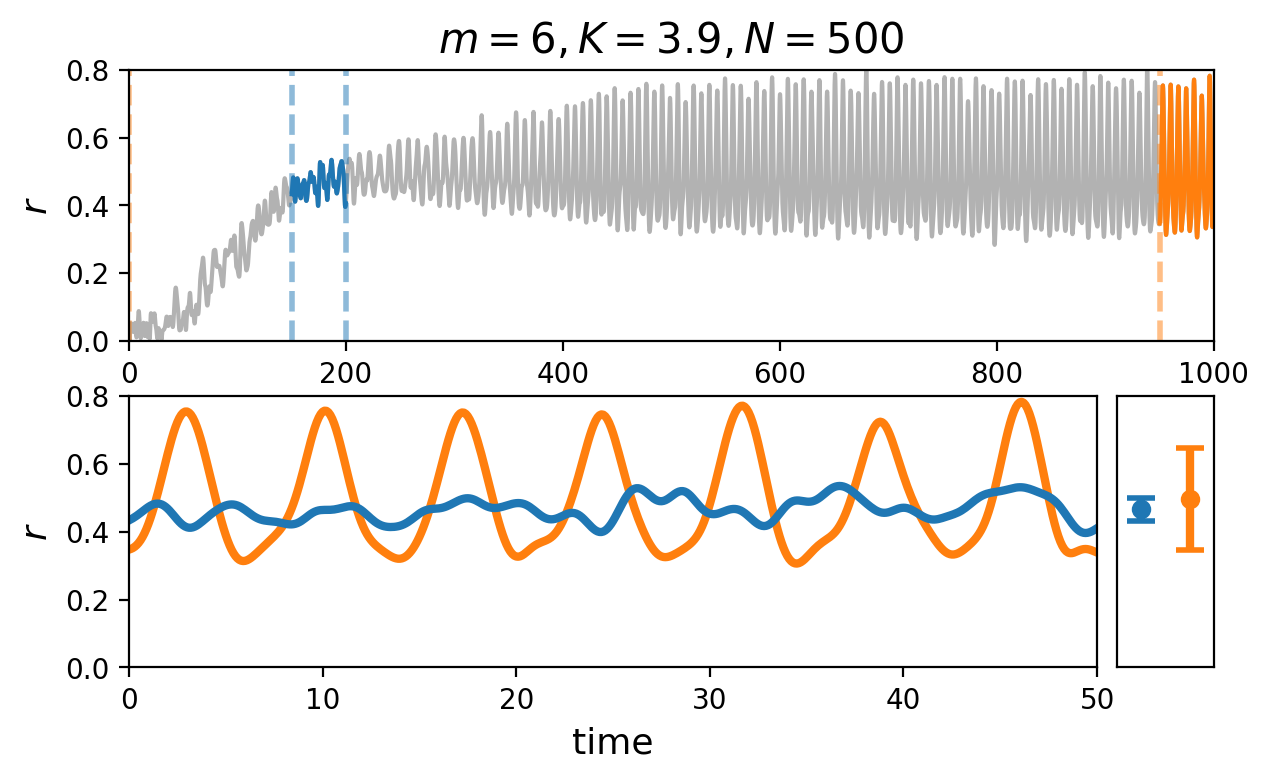

In [218]:
fig = plt.figure(figsize=(7,6))
# fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,5))
ax1 = fig.add_subplot(311)
plt.sca(ax1)
plt.plot(t,rs,color ='k',alpha=0.3)
plt.plot(t[-500:],rs[-500:],color = 'tab:orange')
plt.plot(t[1500:2000],rs[1500:2000],color = 'tab:blue')
plt.axvline(t[1500],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')
plt.axvline(t[2000],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')

plt.axvline(t[-500],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.axvline(t[0],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.ylim(0,0.8)
plt.xlim(0,1000)

plt.ylabel(r'$r$',fontsize=13)
ax1.set_xlabel(r'time',fontsize=13)
plt.title(r'$m=6,K=3.9,N=500$',fontsize=15)

ax2 = fig.add_subplot(312)
plt.sca(ax2)
plt.ylabel(r'$r$',fontsize=13)
plt.xlabel(r'time',fontsize=13)

plt.xlim(0,50)
plt.plot(t[0:500],rs[-500:],color = 'tab:orange',lw=3)
plt.plot(t[0:500],rs[1500:2000],color = 'tab:blue',lw=3)

plt.ylim(0,0.8)


div = make_axes_locatable(ax2)
cax = div.append_axes("right", size="10%", pad=0.1)
plt.sca(cax)

mean_r = np.mean(rs[-500:])
std_r = np.std(rs[-500:])


mean_r2 = np.mean(rs[1500:2000])
std_r2 = np.std(rs[1500:2000])
plt.setp(ax2.get_yticklabels(), visible=True)
plt.errorbar(0.1,mean_r,std_r,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:orange')
plt.errorbar(-0.1,mean_r2,std_r2,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:blue',zorder=3)
cax.set_ylim(0,0.8)
cax.set_xlim(-0.2,0.2)
cax.set_yticks([])
cax.set_xticks([])
# cax.set_title(r'$\bar{r}$ & $r(t)$ std.')


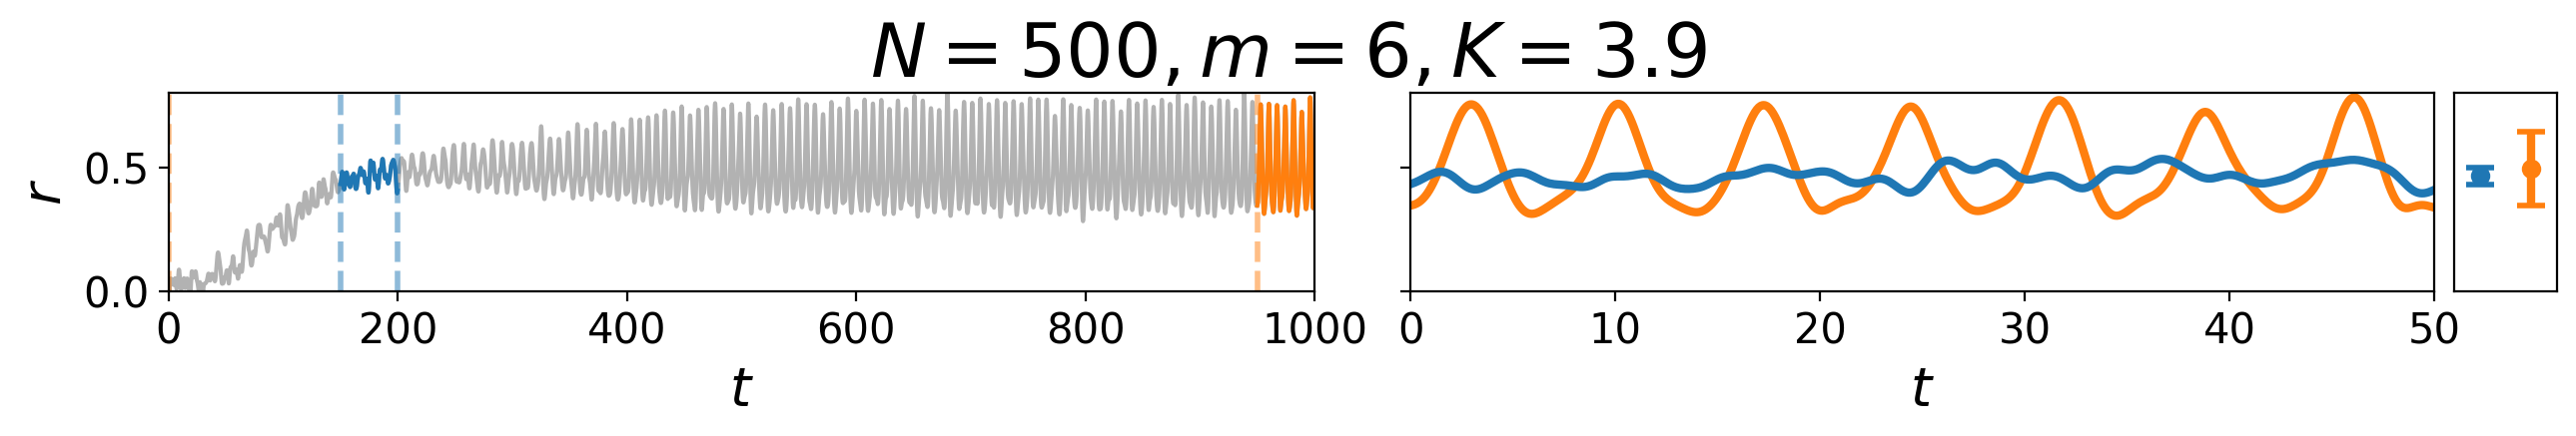

In [220]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(13,2.5))
plt.sca(ax1)
plt.plot(t,rs,color ='k',alpha=0.3)
plt.plot(t[-500:],rs[-500:],color = 'tab:orange')
plt.plot(t[1500:2000],rs[1500:2000],color = 'tab:blue')
plt.axvline(t[1500],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')
plt.axvline(t[2000],0,1,color = 'tab:blue',alpha=0.5,lw=2,ls='--')

plt.axvline(t[-500],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.axvline(t[0],0,1,color = 'tab:orange',alpha=0.5,lw=2,ls='--')
plt.ylim(0,0.8)
plt.xlim(0,1000)

plt.ylabel(r'$r$',fontsize=13*1.5)
ax1.set_xlabel(r'$t$',fontsize=13*1.5)


plt.sca(ax2)
plt.setp(ax2.get_yticklabels(), visible=False)

plt.xlabel(r'$t$',fontsize=13*1.5)

plt.xlim(0,50)
plt.plot(t[0:500],rs[-500:],color = 'tab:orange',lw=3)
plt.plot(t[0:500],rs[1500:2000],color = 'tab:blue',lw=3)

plt.ylim(0,0.8)


div = make_axes_locatable(ax2)
cax = div.append_axes("right", size="10%", pad=0.1)
plt.sca(cax)
# plt.xticks([])
mean_r = np.mean(rs[-500:])
std_r = np.std(rs[-500:])
plt.setp(ax2.get_yticklabels(), visible=True)
plt.errorbar(0.1,mean_r,std_r,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:orange')
plt.errorbar(-0.1,mean_r2,std_r2,capsize=5,capthick=2,lw=3,fmt ='o',color='tab:blue',zorder=3)
cax.set_ylim(0,0.8)
cax.set_xlim(-0.2,0.2)
cax.set_yticks([])
cax.set_xticks([])

mean_r2 = np.mean(rs[1500:2000])
std_r2 = np.std(rs[1500:2000])

# cax.set_title(r'$\bullet : r_{mean}$'+'\n'+'I$: r_{std.}$',fontsize=18)
# cax.set_title(r'$r$',fontsize=18)
# cax.set_title(r'$\bullet : r_{mean}$'+'\n'+'I$: r_{std.}$',fontsize=18)
# cax.set_title(r'$r$',fontsize=18*multi)
for ax in [ax1,ax2]:
    plt.sca(ax)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.suptitle(r'$N= 500,m=6,K=3.9$',fontsize=multi* 18,y=0.85)

plt.tight_layout()

In [ ]:
plt.plot(1,1,'o',color ='yellow',lw=5)

In [ ]:
plt.plot(new_avg_dtheta)

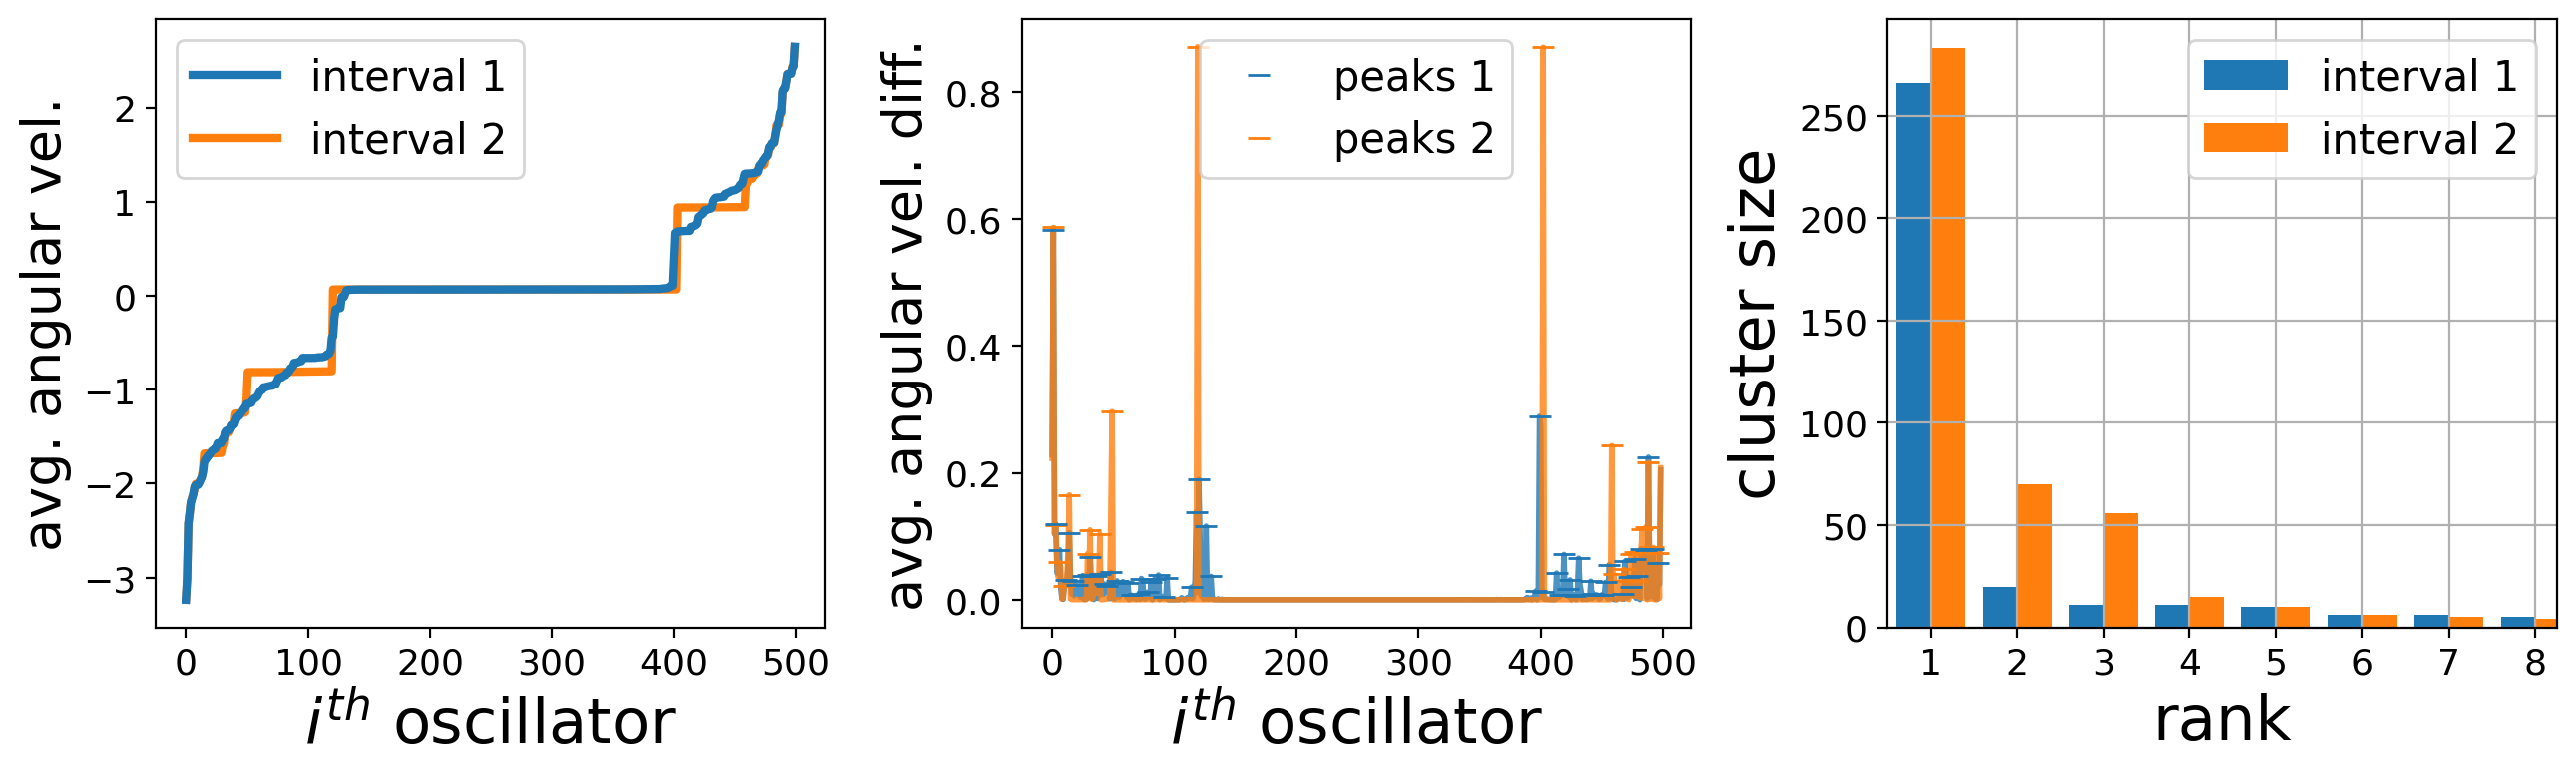

In [226]:
plt.figure(figsize=(13,4))
avg1 = np.sort(avg_dtheta[-8000])
avg2 = np.sort(avg_dtheta[-1])

diff1 = np.diff(avg1)
diff2 = np.diff(avg2)


ax1 = plt.subplot(131)
plt.plot(avg1,lw = 3,color='tab:blue',label='interval 1',zorder=10)
plt.plot(avg2,lw = 3,color='tab:orange',label='interval 2')
plt.xlabel(r'$i^{th}$ oscillator',fontsize=1.5*15)
plt.ylabel('avg. angular vel.', fontsize=1.5*13)
# plt.ylabel(r'$\langle$$\dot{\theta}_i$$\rangle$$_t$', fontsize=1.5*13)
plt.legend(fontsize=1.5*10)


ax2 = plt.subplot(132)

plt.plot(diff1,lw = 2,color='tab:blue',alpha=0.8)
peaks1, _ = find_peaks(diff1, height=0.005)
plt.plot(peaks1, diff1[peaks1], "_",label='peaks 1',markersize=8,color='tab:blue',zorder=5)


plt.plot(diff2,lw = 2,color='tab:orange',alpha=0.8)
peaks2, _ = find_peaks(diff2, height=0.005)
plt.plot(peaks2, diff2[peaks2], "_",label='peaks 2',markersize=8,color='tab:orange')


plt.legend(fontsize=1.5*10,loc='upper center')
plt.xlabel(r'$i^{th}$ oscillator',fontsize=1.5*15)
plt.ylabel('avg. angular vel. diff.', fontsize=1.5*13)
# plt.plot(np.zeros_like(diff1), "--", color="gray")

ax3 = plt.subplot(133)
diff_peaks1 = np.sort(np.diff(peaks1))[::-1]
diff_peaks2 = np.sort(np.diff(peaks2))[::-1]
plt.bar(np.arange(1,1+len(diff_peaks1))-0.2,np.sort(diff_peaks1)[::-1],width=0.4,label = 'interval 1')
plt.bar(np.arange(1,1+len(diff_peaks2))+0.2,np.sort(diff_peaks2)[::-1],width=0.4,label ='interval 2')

# plt.loglog()
plt.xticks([1,2,3,4,5,6,7,8]);
plt.xlim(0.5,8.25)
plt.grid()
plt.ylabel('cluster size',fontsize=1.5*15)
plt.xlabel('rank',fontsize=1.5*15)
plt.legend(fontsize=1.5*10)

for ax in [ax1,ax2,ax3]:
    plt.sca(ax)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

plt.tight_layout()

In [ ]:
df_2 =  pd.DataFrame(diff_peaks2)
df_1 =  pd.DataFrame(diff_peaks1,columns=[1])

In [ ]:
df = pd.concat([df_1,df_2],axis=1)

In [ ]:
import seaborn as sns

In [ ]:
plt.bar(np.arange(len(diff_peaks1)),np.sort(diff_peaks1)[::-1],width=0.5)
plt.bar(np.arange(len(diff_peaks2))-0.5,np.sort(diff_peaks2)[::-1],width=0.5)



In [ ]:
plt.bar(np.arange(1,1+len(diff_peaks1))-0.2,np.sort(diff_peaks1)[::-1],width=0.4,label = 'time 1')
plt.bar(np.arange(1,1+len(diff_peaks2))+0.2,np.sort(diff_peaks2)[::-1],width=0.4,label ='time 2')

# plt.loglog()
plt.xticks([1,2,3,4,5,6,7,8]);
plt.xlim(0.5,8.25)
plt.grid()
plt.ylabel('Cluster size')
plt.xlabel('Rank')
plt.legend()

# plt.yscale('log')

In [ ]:
df

In [ ]:
temp_0 = df[1].to_numpy()
temp_1 = df[0].to_numpy()

In [ ]:
np.where()